### 读取数据

In [188]:
import pandas as pd

# 1. 读取数据
df = pd.read_csv("ruc_Class25Q2_train_rent.csv")
df_test = pd.read_csv("ruc_Class25Q2_test_rent.csv")

C:\Users\heart\AppData\Local\Temp\ipykernel_15996\1366824166.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ruc_Class25Q2_train_rent.csv")


#### 查看数据特性

In [189]:
summary = pd.DataFrame({
    "缺失值数量": df.isnull().sum(),
    "唯一值数量": df.nunique(),
    "数据类型": df.dtypes
})

# 4. 总行数
summary["总样本数"] = len(df)

# 5. 打印或保存
print(summary)

         缺失值数量  唯一值数量     数据类型   总样本数
城市           0     12    int64  98899
户型           1    208   object  98899
装修       73489      1   object  98899
Price        0  98569  float64  98899
楼层           5   1051   object  98899
面积           0  10981   object  98899
朝向           5     91   object  98899
交易时间         0    296   object  98899
付款方式     18423      7   object  98899
租赁方式         0      2   object  98899
电梯           4      2   object  98899
车位       74135      2   object  98899
用水       17740      2   object  98899
用电       17324      2   object  98899
燃气        4582      2   object  98899
采暖       64487      2   object  98899
租期       46933     85   object  98899
配套设施     30451    713   object  98899
lon          0  98899  float64  98899
lat          0  98899  float64  98899
年份           0      2  float64  98899
区县        4677    104  float64  98899
板块        5144    916  float64  98899
环线位置     69663     11   object  98899
物业类别     20124    233   object  98899
建筑年代     261

In [190]:
import pandas as pd

# 定义填充规则：(区县, 板块) → 朝向值
fill_rules = {
    (112, 772): '南',
    (112, 1126): '南 北',
    (81, 711): '南 北',
    (65, 1167): '东',
    (81, 990): '南 北'
}

# 批量处理df和df_test
for data in [df, df_test]:
    # 遍历规则填充
    for (district, block), orient in fill_rules.items():
        mask = (data['朝向'].isnull() & 
                (data['区县'] == district) & 
                (data['板块'] == block))
        data.loc[mask, '朝向'] = orient

In [191]:
# 提取朝向为空的行，并筛选需要的列
empty_orientation = df[df['朝向'].isnull()][['城市', 'lon', 'lat', '区县', '板块']]

# 打印结果
print("朝向为空的行信息：")
print(empty_orientation)


朝向为空的行信息：
Empty DataFrame
Columns: [城市, lon, lat, 区县, 板块]
Index: []


### 朝向虚拟变量

In [192]:
import pandas as pd

# 定义需要新增的朝向类别
directions = ['东', '南', '西', '北', '东南', '西南', '西北', '东北']
# 生成列名：朝向_东、朝向_南...
new_cols = [f'朝向_{d}' for d in directions]

# 为df新增列并赋值0
df[new_cols] = 0

# 为df_test新增列并赋值0
df_test[new_cols] = 0

In [194]:
import pandas as pd

# 定义目标方向列表
directions = ['东', '南', '西', '北', '东南', '西南', '西北', '东北']
# 对应的列名
cols = [f'朝向_{d}' for d in directions]

# 处理函数：按行设置1/0
def set_direction_flags(row):
    # 分割当前行的朝向值（处理空值和空格）
    dirs = str(row['朝向']).split() if pd.notna(row['朝向']) else []
    # 遍历所有方向，存在则设1
    for d, col in zip(directions, cols):
        row[col] = 1 if d in dirs else 0
    return row

# 应用函数处理df
df = df.apply(set_direction_flags, axis=1)

In [195]:
# 筛选所有以"朝向_"开头的列
direction_cols = [col for col in df.columns if col.startswith('朝向_')]

# 打印前8行的这些列
print("处理后前8行的朝向特征：")
display(df[direction_cols].head(8))

处理后前8行的朝向特征：


,朝向_东,朝向_南,朝向_西,朝向_北,朝向_东南,朝向_西南,朝向_西北,朝向_东北
0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0,0


In [196]:
df_test = df_test.apply(set_direction_flags, axis=1)

训练集：城市、户型、Price、面积、交易时间、lon/lat、年份、（区县、板块）---有空值

In [197]:
summary = pd.DataFrame({
    "缺失值数量": df_test.isnull().sum(),
    "唯一值数量": df_test.nunique(),
    "数据类型": df_test.dtypes
})

summary["总样本数"] = len(df_test)

print(summary)

         缺失值数量  唯一值数量     数据类型  总样本数
ID           0   9773    int64  9773
城市           0     12    int64  9773
户型           0     97   object  9773
装修        2682      1   object  9773
楼层           0    627   object  9773
面积           0   2990   object  9773
朝向           0     56   object  9773
交易时间         0    260   object  9773
付款方式      2387      5   object  9773
租赁方式         0      2   object  9773
电梯           0      2   object  9773
车位        7611      2   object  9773
用水        2273      2   object  9773
用电        2227      2   object  9773
燃气         591      2   object  9773
采暖        6560      2   object  9773
租期        5175     48   object  9773
配套设施      3694    361   object  9773
lon          0   9773  float64  9773
lat          0   9773  float64  9773
年份           0      2  float64  9773
区县         925    103  float64  9773
板块         936    778  float64  9773
环线位置      6962     11   object  9773
物业类别      2625    185   object  9773
建筑年代      3381    594   object  9773
开

测试集：城市、户型、楼层、朝向、Price、面积、交易时间、lon/lat、年份、（区县、板块）---有空值

### 处理装修这列为0/1，1是精装修

In [198]:
import numpy as np
DECORATION_COL = "装修"  # 原始装修列名
DUMMY_COL = "is_精装"    # 生成的虚拟变量列名
TARGET_VALUE = "精装修"   # 目标值（匹配此值则虚拟变量为1）


# ---------------- 2. 为 df 生成"是否精装修"虚拟变量 ----------------
print("=" * 50)
print("处理 df：")
# 生成虚拟变量：
# 条件1：装修列 == "精装修" → 1
# 条件2：装修列 为空（isna()） → 0
# 条件3：其他情况（如"简装""毛坯"）→ 0
df[DUMMY_COL] = np.where(
    df[DECORATION_COL] == TARGET_VALUE,  # 满足"精装修"
    1,  # 赋值1
    0   # 不满足则赋值0（包括空值和其他装修类型）
)

# 验证结果：统计各情况的行数
print(f"df 中 {TARGET_VALUE} 行数：{len(df[df[DECORATION_COL] == TARGET_VALUE])} → {DUMMY_COL}=1")
print(f"df 中 {DECORATION_COL} 为空的行数：{len(df[df[DECORATION_COL].isna()])} → {DUMMY_COL}=0")
print(f"df 中其他装修类型行数：{len(df[(df[DECORATION_COL] != TARGET_VALUE) & (df[DECORATION_COL].notna())])} → {DUMMY_COL}=0")

# 可选：打印前5行预览（显示原始装修列和虚拟变量列）
print("\ndf 前5行预览（原始装修列 + 虚拟变量列）：")
print(df[[DECORATION_COL, DUMMY_COL]].head().to_string(index=False))


# ---------------- 3. 为 df_test 生成"是否精装修"虚拟变量（逻辑与df一致） ----------------
print("\n" + "=" * 50)
print("处理 df_test：")
# 同样直接在原df_test上操作
# df_test_with_dummy = df_test.copy()  # 删除这行

df_test[DUMMY_COL] = np.where(
    df_test[DECORATION_COL] == TARGET_VALUE,
    1,
    0
)

# 验证结果
print(f"df_test 中 {TARGET_VALUE} 行数：{len(df_test[df_test[DECORATION_COL] == TARGET_VALUE])} → {DUMMY_COL}=1")
print(f"df_test 中 {DECORATION_COL} 为空的行数：{len(df_test[df_test[DECORATION_COL].isna()])} → {DUMMY_COL}=0")
print(f"df_test 中其他装修类型行数：{len(df_test[(df_test[DECORATION_COL] != TARGET_VALUE) & (df_test[DECORATION_COL].notna())])} → {DUMMY_COL}=0")

# 可选：打印前5行预览
print("\ndf_test 前5行预览（原始装修列 + 虚拟变量列）：")
print(df_test[[DECORATION_COL, DUMMY_COL]].head().to_string(index=False))

# 最终确认
print("\n" + "=" * 50)
print("最终确认：")
print(f"df 的列名: {df.columns.tolist()}")
print(f"df_test 的列名: {df_test.columns.tolist()}")
print(f"df 中 '{DUMMY_COL}' 列已创建，值分布:")
print(df[DUMMY_COL].value_counts())

处理 df：
df 中 精装修 行数：25410 → is_精装=1
df 中 装修 为空的行数：73489 → is_精装=0
df 中其他装修类型行数：0 → is_精装=0

df 前5行预览（原始装修列 + 虚拟变量列）：
 装修  is_精装
精装修      1
精装修      1
精装修      1
精装修      1
精装修      1

处理 df_test：
df_test 中 精装修 行数：7091 → is_精装=1
df_test 中 装修 为空的行数：2682 → is_精装=0
df_test 中其他装修类型行数：0 → is_精装=0

df_test 前5行预览（原始装修列 + 虚拟变量列）：
 装修  is_精装
精装修      1
精装修      1
精装修      1
精装修      1
精装修      1

最终确认：
df 的列名: ['城市', '户型', '装修', 'Price', '楼层', '面积', '朝向', '交易时间', '付款方式', '租赁方式', '电梯', '车位', '用水', '用电', '燃气', '采暖', '租期', '配套设施', 'lon', 'lat', '年份', '区县', '板块', '环线位置', '物业类别', '建筑年代', '开发商', '房屋总数', '楼栋总数', '物业公司', '绿 化 率', '容 积 率', '物 业 费', '建筑结构', '物业办公电话', '产权描述', '供水', '供暖', '供电', '燃气费', '供热费', '停车位', '停车费用', 'coord_x', 'coord_y', '客户反馈', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北', 'is_精装']
df_test 的列名: ['ID', '城市', '户型', '装修', '楼层', '面积', '朝向', '交易时间', '付款方式', '租赁方式', '电梯', '车位', '用水', '用电', '燃气', '采暖', '租期', '配套设施', 'lon', 'lat', '年份', '区县', '板块', '环线位置', '物业类别', '建筑年代

#### 正则提取面积

In [199]:
import numpy as np
import re

# 提取数字的函数
def extract_numeric(value):
    if pd.isnull(value):
        return np.nan
    # 提取所有数字（包括小数）
    nums = re.findall(r"\d+\.?\d*", str(value))
    if not nums:
        return np.nan
    nums = list(map(float, nums))
    # 若为区间（如2.61-2.63），取平均值
    return np.mean(nums)

# 需要处理的列
cols_to_clean = ["面积", "燃气费", "供热费"]

# 检查哪些列在 DataFrame 中存在
cols_to_clean = [col for col in cols_to_clean if col in df.columns]

# 对每列应用提取函数
for col in cols_to_clean:
    df[col] = df[col].apply(extract_numeric)

# 查看结果前几行
print(df[cols_to_clean].head())


      面积   燃气费   供热费
0  36.42  2.61  27.0
1  41.00  2.61  30.0
2  37.36  2.62  38.0
3  55.42  2.61  37.0
4  49.30  2.61  30.0


In [200]:
# 提取数字的函数
def extract_numeric(value):
    if pd.isnull(value):
        return np.nan
    # 提取所有数字（包括小数）
    nums = re.findall(r"\d+\.?\d*", str(value))
    if not nums:
        return np.nan
    nums = list(map(float, nums))
    # 若为区间（如2.61-2.63），取平均值
    return np.mean(nums)

# 需要处理的列
cols_to_clean = ["面积","燃气费", "供热费"]

# 检查哪些列在 DataFrame 中存在
cols_to_clean = [col for col in cols_to_clean if col in df_test.columns]

# 对每列应用提取函数
for col in cols_to_clean:
    df_test[col] = df_test[col].apply(extract_numeric)

# 查看结果前几行
print(df_test[cols_to_clean].head())


       面积   燃气费   供热费
0   86.94  2.15   NaN
1   72.60  3.45   NaN
2   98.00   NaN   NaN
3   98.97  2.61  30.0
4  170.53   NaN   NaN


### 处理训练集的空值，去掉户型为空的，把区域/板块空值补充

In [201]:
import pandas as pd
import re  # 用于正则表达式匹配

# ---------------- 1. 打印“户型”列的所有独特值（去重+排除空值） ----------------
print("户型列的所有独特值：")
# 提取非空的唯一值，避免打印NaN
unique_house_types = df['户型'].dropna().unique()
# 遍历打印，方便查看格式（如“3室2厅1卫”“2室1厅”等）
for idx, house_type in enumerate(unique_house_types, 1):
    print(f"{idx:2d}. {house_type}")

户型列的所有独特值：
 1. 1室1厅1卫
 2. 3室1厅2卫
 3. 3室2厅
 4. 4室2厅
 5. 2室1厅
 6. 4室1厅
 7. 1室0厅1卫
 8. 2室1厅1卫
 9. 1室1厅
10. 1室2厅2卫
11. 2房间
12. 2房间1卫
13. 1房间
14. 3室1厅
15. 1室1厅2卫
16. 7室1厅
17. 2室2厅
18. 1室0厅
19. 4房间
20. 5室4厅
21. 2室0厅
22. 2室1厅2卫
23. 3房间
24. 3室1厅1卫
25. 7房间
26. 5室2厅
27. 2室2厅1卫
28. 5房间
29. 3室1厅3卫
30. 4室2厅3卫
31. 1房间1卫
32. 8室4厅
33. 3室2厅2卫
34. 4房间2卫
35. 6室3厅
36. 6室2厅
37. 5室3厅
38. 2室2厅2卫
39. 3室2厅3卫
40. 6房间
41. 4室3厅
42. 5室1厅
43. 0室0厅
44. 9房间
45. 3室3厅
46. 6室1厅
47. 3房间2卫
48. 3室0厅
49. 1室2厅
50. 车库
51. 4室2厅2卫
52. 12室4厅
53. 0室1厅
54. 4室1厅2卫
55. 5室2厅2卫
56. 3室2厅1卫
57. 3室3厅2卫
58. 5室2厅4卫
59. 4室2厅4卫
60. 1室2厅1卫
61. 5室4厅3卫
62. 5室2厅3卫
63. 2室0厅1卫
64. 2房间2卫
65. 3房间1卫
66. 9房间5卫
67. 4房间3卫
68. 5房间3卫
69. 5房间2卫
70. 1室1厅0卫
71. 6房间2卫
72. 4室1厅3卫
73. 1室0厅0卫
74. 6房间3卫
75. 4室1厅1卫
76. 5室1厅4卫
77. 6室2厅4卫
78. 4室3厅3卫
79. 6室3厅3卫
80. 3室0厅0卫
81. 4房间1卫
82. 5室3厅3卫
83. 4室2厅1卫
84. 3室1厅0卫
85. 7室2厅3卫
86. 3室3厅3卫
87. 3室0厅1卫
88. 5室3厅5卫
89. 5室1厅3卫
90. 2室2厅3卫
91. 6室2厅3卫
92. 2室1厅3卫
93. 5房间1卫
94. 7房间3卫
95. 5室0厅
96. 2室3厅
97. 7室3厅
98. 8室2厅
99. 4室4厅
10

In [202]:
check_cols = ["区县", "板块"]  # 目标检查列，与你的列名完全一致

# ---------------- 2. 循环检查每一列，找出df_test多的取值 ----------------
for col in check_cols:
    print("=" * 60)
    print(f"正在检查列：{col}")
    
    # 步骤1：提取两数据集该列的“非空唯一值”（空值不参与对比，避免干扰）
    # df（训练集）的非空唯一值 → 转集合，方便计算差集
    df_unique = set(df[col].dropna().unique())
    # df_test（测试集）的非空唯一值 → 转集合
    df_test_unique = set(df_test[col].dropna().unique())
    
    # 步骤2：计算“df_test有但df没有的取值”（集合差集：test_unique - df_unique）
    test_extra_vals = df_test_unique - df_unique
    
    # 步骤3：打印结果
    print(f"训练集（df）{col}列的唯一值数量：{len(df_unique)}")
    print(f"测试集（df_test）{col}列的唯一值数量：{len(df_test_unique)}")
    
    if len(test_extra_vals) > 0:
        print(f"\n⚠️  测试集（df_test）{col}列多出的取值（共{len(test_extra_vals)}个）：")
        # 排序后打印，方便查看（中文按拼音排序，需确保环境支持）
        for val in sorted(test_extra_vals):
            print(f"  - {val}")
    else:
        print(f"\n✅ 训练集（df）{col}列包含测试集（df_test）的所有取值，无多出内容。")

正在检查列：区县
训练集（df）区县列的唯一值数量：104
测试集（df_test）区县列的唯一值数量：103

⚠️  测试集（df_test）区县列多出的取值（共2个）：
  - 46.0
  - 87.0
正在检查列：板块
训练集（df）板块列的唯一值数量：916
测试集（df_test）板块列的唯一值数量：778

⚠️  测试集（df_test）板块列多出的取值（共4个）：
  - 414.0
  - 418.0
  - 841.0
  - 1012.0


### KNN区域/板块空值

In [203]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter

def fill_missing_district_plate(df, city_col='城市', district_col='区县', plate_col='板块', 
                               lon_col='lon', lat_col='lat', k=5):
    """
    使用KNN方法填充区县和板块的空值
    
    参数:
    df: 包含数据的DataFrame
    city_col: 城市列名
    district_col: 区县列名  
    plate_col: 板块列名
    lon_col: 经度列名
    lat_col: 纬度列名
    k: KNN中的邻居数量
    """
    
    df_filled = df.copy()
    
    print("开始处理缺失值...")
    print(f"原始数据形状: {df_filled.shape}")
    
    # 1. 找出区县或板块有空值的行
    mask_missing = df_filled[district_col].isna() | df_filled[plate_col].isna()
    missing_rows = df_filled[mask_missing]
    print(f"需要处理的行数: {len(missing_rows)}")
    
    if len(missing_rows) == 0:
        print("没有需要填充的缺失值")
        return df_filled
    
    # 2. 第一步：处理区县为空的行
    print("\n=== 第一步：填充区县缺失值 ===")
    district_missing = df_filled[df_filled[district_col].isna()]
    print(f"区县缺失的行数: {len(district_missing)}")
    
    for idx, row in district_missing.iterrows():
        city = row[city_col]
        plate = row[plate_col]
        lon = row[lon_col]
        lat = row[lat_col]
        
        # 筛选同城市的行，且区县不为空
        same_city_mask = (df_filled[city_col] == city) & (df_filled[district_col].notna())
        candidate_df = df_filled[same_city_mask]
        
        if len(candidate_df) == 0:
            print(f"警告: 城市 {city} 没有可用的候选行，跳过第 {idx} 行")
            continue
        
        # 如果当前行有板块信息，优先在同板块内寻找
        if pd.notna(plate):
            same_plate_mask = candidate_df[plate_col] == plate
            plate_candidates = candidate_df[same_plate_mask]
            
            if len(plate_candidates) > 0:
                candidate_df = plate_candidates
        
        # 准备KNN
        candidate_coords = candidate_df[[lon_col, lat_col]].values
        current_coord = np.array([[lon, lat]])
        
        # 使用KNN找到最近的邻居
        n_neighbors = min(k, len(candidate_df))
        if n_neighbors > 0:
            knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
            knn.fit(candidate_coords)
            distances, indices = knn.kneighbors(current_coord)
            
            # 投票决定区县
            neighbor_districts = candidate_df.iloc[indices[0]][district_col].values
            district_counts = Counter(neighbor_districts)
            
            # 选择出现次数最多的区县，如果平票选择距离最近的
            most_common = district_counts.most_common()
            max_count = most_common[0][1]
            candidates = [district for district, count in most_common if count == max_count]
            
            if len(candidates) == 1:
                chosen_district = candidates[0]
            else:
                # 平票时选择距离最近的邻居的区县
                chosen_district = neighbor_districts[0]
            
            df_filled.at[idx, district_col] = int(chosen_district)
            print(f"行 {idx}: 区县填充为 {chosen_district}")
    
    # 3. 第二步：处理板块为空的行
    print("\n=== 第二步：填充板块缺失值 ===")
    plate_missing = df_filled[df_filled[plate_col].isna()]
    print(f"板块缺失的行数: {len(plate_missing)}")
    
    for idx, row in plate_missing.iterrows():
        city = row[city_col]
        district = row[district_col]
        lon = row[lon_col]
        lat = row[lat_col]
        
        # 筛选同城市的行，且板块不为空
        same_city_mask = (df_filled[city_col] == city) & (df_filled[plate_col].notna())
        candidate_df = df_filled[same_city_mask]
        
        if len(candidate_df) == 0:
            print(f"警告: 城市 {city} 没有可用的候选行，跳过第 {idx} 行")
            continue
        
        # 如果当前行有区县信息，优先在同区县内寻找
        if pd.notna(district):
            same_district_mask = candidate_df[district_col] == district
            district_candidates = candidate_df[same_district_mask]
            
            if len(district_candidates) > 0:
                candidate_df = district_candidates
        
        # 准备KNN
        candidate_coords = candidate_df[[lon_col, lat_col]].values
        current_coord = np.array([[lon, lat]])
        
        # 使用KNN找到最近的邻居
        n_neighbors = min(k, len(candidate_df))
        if n_neighbors > 0:
            knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
            knn.fit(candidate_coords)
            distances, indices = knn.kneighbors(current_coord)
            
            # 投票决定板块
            neighbor_plates = candidate_df.iloc[indices[0]][plate_col].values
            plate_counts = Counter(neighbor_plates)
            
            # 选择出现次数最多的板块，如果平票选择距离最近的
            most_common = plate_counts.most_common()
            max_count = most_common[0][1]
            candidates = [plate for plate, count in most_common if count == max_count]
            
            if len(candidates) == 1:
                chosen_plate = candidates[0]
            else:
                # 平票时选择距离最近的邻居的板块
                chosen_plate = neighbor_plates[0]
            
            df_filled.at[idx, plate_col] = int(chosen_plate)
            print(f"行 {idx}: 板块填充为 {chosen_plate}")
    
    # 4. 检查填充结果
    print("\n=== 填充结果统计 ===")
    district_still_missing = df_filled[district_col].isna().sum()
    plate_still_missing = df_filled[plate_col].isna().sum()
    
    print(f"填充后区县仍缺失: {district_still_missing} 行")
    print(f"填充后板块仍缺失: {plate_still_missing} 行")
    print(f"最终数据形状: {df_filled.shape}")
    
    return df_filled



In [204]:
import pandas as pd

# 假设你的DataFrame名为df，城市列名为“城市”，区县列名为“区县”
# 1. 筛选“城市=9”的所有行（确保城市列是数值型，若为字符串需改为df['城市'] == '9'）
city_9_rows = df[df['城市'] == 9]

# 2. 打印“城市=9”的总行数
print(f"城市列为9的总行数：{len(city_9_rows)}")

# 3. 打印“城市=9”对应的所有区县（去重后，避免重复显示）
city_9_counties = city_9_rows['板块'].dropna().unique()  # 排除区县为空值的情况
print(f"\n城市列为9包含的区县（共{len(city_9_counties)}个）：")
for idx, county in enumerate(city_9_counties, 1):
    print(f"  {idx}. {county}")

# 4. （可选）打印每个区县的具体行数（了解区县分布）
print(f"\n城市列为9的各区县行数分布：")
county_row_count = city_9_rows['板块'].value_counts(dropna=False)  # dropna=False会包含区县为空的行数
for county, count in county_row_count.items():
    # 处理区县为空的情况，显示为“（区县为空）”
    county_display = county if pd.notna(county) else "（板块为空）"
    print(f"  {county_display}：{count}行")

城市列为9的总行数：1255

城市列为9包含的区县（共0个）：

城市列为9的各区县行数分布：
  （板块为空）：1255行


In [205]:
df_filled = fill_missing_district_plate(df, k=5)

开始处理缺失值...
原始数据形状: (98899, 55)
需要处理的行数: 5144

=== 第一步：填充区县缺失值 ===
区县缺失的行数: 4677
行 54: 区县填充为 95.0
行 88: 区县填充为 81.0
行 319: 区县填充为 68.0
行 1083: 区县填充为 95.0
行 1110: 区县填充为 68.0
行 1873: 区县填充为 81.0
行 2077: 区县填充为 95.0
行 2100: 区县填充为 68.0
行 2175: 区县填充为 62.0
行 2367: 区县填充为 62.0
行 2644: 区县填充为 62.0
行 2687: 区县填充为 81.0
行 2813: 区县填充为 68.0
行 2930: 区县填充为 62.0
行 3013: 区县填充为 81.0
行 3107: 区县填充为 95.0
行 3225: 区县填充为 60.0
行 3298: 区县填充为 81.0
行 3315: 区县填充为 81.0
行 3327: 区县填充为 68.0
行 3509: 区县填充为 68.0
行 3521: 区县填充为 68.0
行 3918: 区县填充为 95.0
行 4071: 区县填充为 7.0
行 4159: 区县填充为 62.0
行 4203: 区县填充为 68.0
行 4317: 区县填充为 81.0
行 4780: 区县填充为 95.0
行 4782: 区县填充为 68.0
行 4884: 区县填充为 81.0
行 4930: 区县填充为 68.0
行 5019: 区县填充为 68.0
行 5087: 区县填充为 68.0
行 5203: 区县填充为 95.0
行 5204: 区县填充为 95.0
行 5211: 区县填充为 95.0
行 5229: 区县填充为 95.0
行 5265: 区县填充为 95.0
行 5266: 区县填充为 95.0
行 5277: 区县填充为 95.0
行 5299: 区县填充为 95.0
行 5398: 区县填充为 62.0
行 5426: 区县填充为 95.0
行 5445: 区县填充为 95.0
行 5446: 区县填充为 95.0
行 5470: 区县填充为 95.0
行 5530: 区县填充为 95.0
行 5571: 区县填充为 95.0
行 5574: 区县填充为 

In [207]:
summary = pd.DataFrame({
    "缺失值数量": df_filled.isnull().sum(),
    "唯一值数量": df_filled.nunique(),
    "数据类型": df_filled.dtypes
})

summary["总样本数"] = len(df_filled)

print(summary)

         缺失值数量  唯一值数量     数据类型   总样本数
城市           0     12    int64  98899
户型           1    208   object  98899
装修       73489      1   object  98899
Price        0  98569  float64  98899
楼层           5   1051   object  98899
面积           0  10981  float64  98899
朝向           0     91   object  98899
交易时间         0    296   object  98899
付款方式     18423      7   object  98899
租赁方式         0      2   object  98899
电梯           4      2   object  98899
车位       74135      2   object  98899
用水       17740      2   object  98899
用电       17324      2   object  98899
燃气        4582      2   object  98899
采暖       64487      2   object  98899
租期       46933     85   object  98899
配套设施     30451    713   object  98899
lon          0  98899  float64  98899
lat          0  98899  float64  98899
年份           0      2  float64  98899
区县        1255    104  float64  98899
板块        1255    916  float64  98899
环线位置     69663     11   object  98899
物业类别     20124    233   object  98899
建筑年代     261

#### KNN测试集 分别空：925 936

In [208]:
df_filled_test = fill_missing_district_plate(df_test, k=5)

开始处理缺失值...
原始数据形状: (9773, 55)
需要处理的行数: 936

=== 第一步：填充区县缺失值 ===
区县缺失的行数: 925
警告: 城市 9 没有可用的候选行，跳过第 6 行
警告: 城市 9 没有可用的候选行，跳过第 8 行
行 16: 区县填充为 78.0
警告: 城市 9 没有可用的候选行，跳过第 21 行
行 55: 区县填充为 64.0
行 84: 区县填充为 88.0
行 105: 区县填充为 130.0
行 112: 区县填充为 108.0
行 130: 区县填充为 64.0
行 137: 区县填充为 86.0
行 145: 区县填充为 88.0
行 146: 区县填充为 63.0
行 160: 区县填充为 99.0
警告: 城市 9 没有可用的候选行，跳过第 165 行
警告: 城市 9 没有可用的候选行，跳过第 184 行
行 188: 区县填充为 10.0
行 225: 区县填充为 126.0
行 235: 区县填充为 88.0
行 242: 区县填充为 64.0
警告: 城市 9 没有可用的候选行，跳过第 248 行
行 291: 区县填充为 24.0
警告: 城市 9 没有可用的候选行，跳过第 301 行
警告: 城市 9 没有可用的候选行，跳过第 317 行
警告: 城市 9 没有可用的候选行，跳过第 334 行
行 350: 区县填充为 76.0
行 356: 区县填充为 67.0
行 378: 区县填充为 86.0
行 404: 区县填充为 91.0
行 407: 区县填充为 112.0
行 422: 区县填充为 124.0
行 433: 区县填充为 62.0
警告: 城市 9 没有可用的候选行，跳过第 470 行
行 491: 区县填充为 64.0
行 492: 区县填充为 64.0
警告: 城市 9 没有可用的候选行，跳过第 493 行
警告: 城市 9 没有可用的候选行，跳过第 502 行
警告: 城市 9 没有可用的候选行，跳过第 515 行
行 533: 区县填充为 112.0
行 539: 区县填充为 88.0
警告: 城市 9 没有可用的候选行，跳过第 543 行
行 551: 区县填充为 50.0
行 572: 区县填充为 84.0
行 573: 区县填充为 17.0
行 580: 区县填充

### 城市9没有任何区县、板块是有值的

城市=9且房价/经纬度非空的样本数：1255


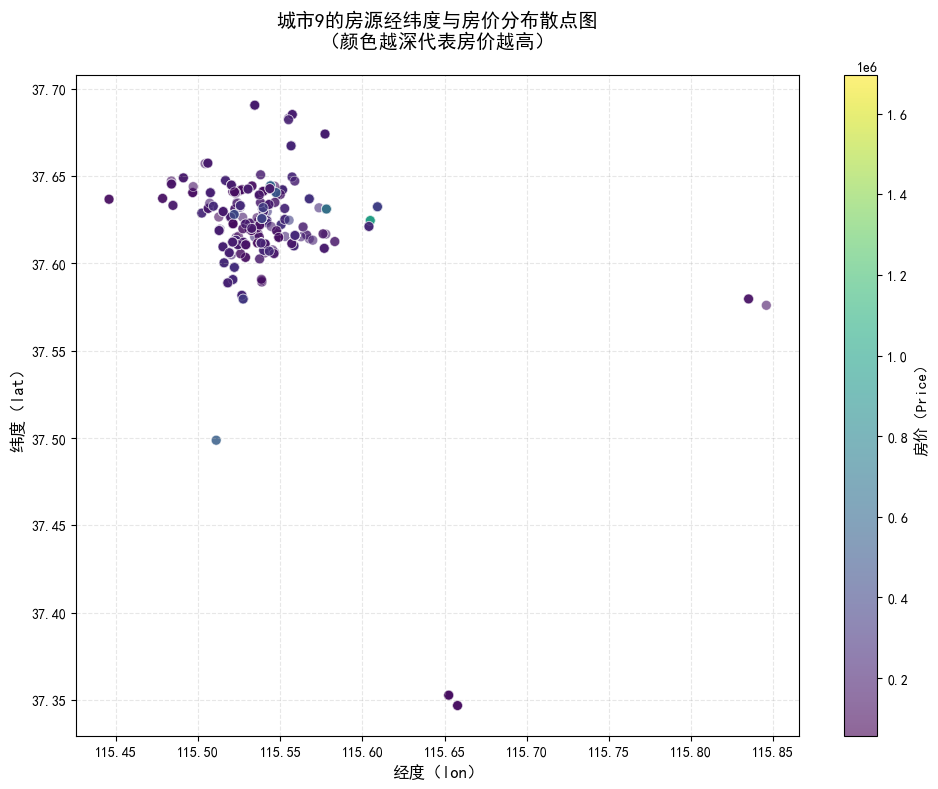

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------- 1. 数据筛选：只保留“城市=9”的非空房价数据 ----------------
# 假设你的DataFrame名为df，关键列名：城市列=“城市”、经度=“lon”、纬度=“lat”、房价=“Price”
# 筛选条件：城市=9 + 房价非空 + 经纬度非空（避免画图异常）
city9_data = df[
    (df["城市"] == 9)  # 城市为9
    & (df["Price"].notna())  # 房价非空
    & (df["lon"].notna())  # 经度非空
    & (df["lat"].notna())  # 纬度非空
].copy()

# 打印筛选后的数据量，确认有足够样本画图
print(f"城市=9且房价/经纬度非空的样本数：{len(city9_data)}")
if len(city9_data) < 10:  # 样本太少画图无意义，提示用户
    print("警告：有效样本数太少（<10），可能无法观察到房价区分规律！")

# ---------------- 2. 设置中文字体（避免中文乱码） ----------------
plt.rcParams["font.sans-serif"] = ["WenQuanYi Zen Hei", "SimHei"]  # 适配不同系统
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示异常

# ---------------- 3. 绘制经纬度-房价散点图 ----------------
fig, ax = plt.subplots(figsize=(10, 8))  # 设置画布大小（宽10，高8）

# 散点图核心代码：x=经度，y=纬度，c=房价（颜色映射），alpha=透明度（避免点重叠）
scatter = ax.scatter(
    x=city9_data["lon"],  # X轴：经度
    y=city9_data["lat"],  # Y轴：纬度
    c=city9_data["Price"],  # 颜色：房价（值越高，颜色越深）
    cmap="viridis",  # 颜色映射方案（viridis是兼顾色盲的常用方案，可换"plasma"等）
    alpha=0.6,  # 透明度（0.6避免点重叠后看不清）
    s=50,  # 点的大小（50适中，可根据样本数调整）
    edgecolors="white",  # 点的边框颜色（白色边框让点更清晰）
    linewidths=0.5  # 边框宽度
)

# ---------------- 4. 添加图表标签和颜色条（提升可读性） ----------------
ax.set_xlabel("经度（lon）", fontsize=12, fontweight="bold")  # X轴标签
ax.set_ylabel("纬度（lat）", fontsize=12, fontweight="bold")  # Y轴标签
ax.set_title("城市9的房源经纬度与房价分布散点图\n（颜色越深代表房价越高）", 
             fontsize=14, fontweight="bold", pad=20)  # 标题

# 添加颜色条：解释颜色对应的房价范围
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("房价（Price）", fontsize=11, fontweight="bold")
cbar.ax.tick_params(labelsize=10)  # 颜色条刻度字体大小

# 添加网格线（辅助观察点的位置）
ax.grid(True, alpha=0.3, linestyle="--")

# 调整布局（避免标签被截断）
plt.tight_layout()

plt.show()


In [210]:
import pandas as pd

# 假设你的DataFrame名为df，城市列名为“城市”，区县列名为“区县”
# 1. 筛选“城市=9”的所有行（确保城市列是数值型，若为字符串需改为df['城市'] == '9'）
city_9_rows = df[df['城市'] == 9]

# 2. 打印“城市=9”的总行数
print(f"城市列为9的总行数：{len(city_9_rows)}")

# 3. 打印“城市=9”对应的所有区县（去重后，避免重复显示）
city_9_counties = city_9_rows['户型'].dropna().unique()  # 排除区县为空值的情况
print(f"\n城市列为9包含的区县（共{len(city_9_counties)}个）：")
for idx, county in enumerate(city_9_counties, 1):
    print(f"  {idx}. {county}")

# 4. （可选）打印每个区县的具体行数（了解区县分布）
print(f"\n城市列为9的各区县行数分布：")
county_row_count = city_9_rows['户型'].value_counts(dropna=False)  # dropna=False会包含区县为空的行数
for county, count in county_row_count.items():
    # 处理区县为空的情况，显示为“（区县为空）”
    county_display = county if pd.notna(county) else "（户型为空）"
    print(f"  {county_display}：{count}行")

城市列为9的总行数：1255

城市列为9包含的区县（共35个）：
  1. 4室2厅
  2. 3室2厅
  3. 3室1厅
  4. 1室1厅
  5. 2室1厅
  6. 2室2厅
  7. 5室2厅
  8. 1室2厅
  9. 5室3厅
  10. 3室3厅
  11. 1室0厅
  12. 2室0厅
  13. 2室2厅1卫
  14. 2室1厅1卫
  15. 2室3厅
  16. 1室1厅1卫
  17. 3室2厅1卫
  18. 4室2厅2卫
  19. 3室2厅2卫
  20. 1室0厅0卫
  21. 3室1厅1卫
  22. 3室1厅2卫
  23. 1室0厅1卫
  24. 2室1厅0卫
  25. 5室3厅6卫
  26. 1室1厅0卫
  27. 2室2厅2卫
  28. 4室2厅1卫
  29. 2室0厅1卫
  30. 5室2厅3卫
  31. 5室2厅4卫
  32. 4室2厅3卫
  33. 5室2厅5卫
  34. 2室2厅0卫
  35. 2室3厅1卫

城市列为9的各区县行数分布：
  3室2厅：176行
  2室1厅1卫：168行
  2室2厅1卫：166行
  2室1厅：157行
  2室2厅：126行
  3室2厅2卫：91行
  3室2厅1卫：72行
  1室1厅1卫：69行
  1室1厅：67行
  3室1厅：40行
  3室1厅1卫：38行
  4室2厅：16行
  4室2厅2卫：15行
  2室2厅2卫：8行
  1室0厅1卫：5行
  2室0厅：4行
  5室2厅：4行
  3室1厅2卫：4行
  2室1厅0卫：3行
  1室0厅：3行
  2室0厅1卫：3行
  1室2厅：2行
  1室0厅0卫：2行
  5室2厅4卫：2行
  1室1厅0卫：2行
  4室2厅1卫：2行
  5室2厅3卫：2行
  5室2厅5卫：1行
  2室2厅0卫：1行
  4室2厅3卫：1行
  5室3厅6卫：1行
  2室3厅：1行
  5室3厅：1行
  3室3厅：1行
  2室3厅1卫：1行


## 分开处理城市9和其他城市的数据

## city9_data是训练集中数据，city9_t是测试集中的数据

In [211]:
import pandas as pd
import re
import numpy as np

# ---------------- 1. 筛选“城市=9”的所有数据（核心：只处理目标城市） ----------------
# 假设你的原始DataFrame名为df，关键列：城市列=“城市”、户型列=“户型”

city9_data = df[
    (df["城市"] == 9)  # 仅保留城市为9的行
    & (df["户型"].notna())  # 排除户型为空的行
].copy()

# 验证筛选结果（与你之前统计的1255行对比，差异可能来自户型空值）
print(f"城市=9且户型非空的总行数：{len(city9_data)}")
if len(city9_data) != 1255:
    print(f"提示：与原始统计的1255行差异{abs(len(city9_data)-1255)}行，可能是部分行的户型为空")


# ---------------- 2. 定义正则提取函数：从户型字符串中提取“室、厅、卫” ----------------
def extract_room_hall_bath(house_type_str):
    """
    输入户型字符串（如“3室2厅1卫”“2室1厅”“1室0厅0卫”），
    输出（室数量, 厅数量, 卫数量），均为整数；未找到的项默认填0。
    """
    # 正则表达式：分别匹配“X室”“X厅”“X卫”中的数字X（X为0-9的阿拉伯数字）
    # \d+ 表示“1个及以上数字”，括号()用于提取匹配到的数字
    room_pattern = re.compile(r'(\d+)室')  # 匹配“室”前面的数字（如“3室”提取“3”）
    hall_pattern = re.compile(r'(\d+)厅')  # 匹配“厅”前面的数字（如“2厅”提取“2”）
    bath_pattern = re.compile(r'(\d+)卫')  # 匹配“卫”前面的数字（如“1卫”提取“1”）

    # 提取数字：找到匹配结果则转整数，未找到则填0
    # search()：在字符串中找第一个匹配项；group(1)：获取括号内提取的数字
    room = int(room_pattern.search(house_type_str).group(1)) if room_pattern.search(house_type_str) else 0
    hall = int(hall_pattern.search(house_type_str).group(1)) if hall_pattern.search(house_type_str) else 0
    bath = int(bath_pattern.search(house_type_str).group(1)) if bath_pattern.search(house_type_str) else 0

    return (room, hall, bath)


# ---------------- 3. 应用函数，为城市9的数据生成“室、厅、卫”3列 ----------------
# 对city9_data的“户型”列逐行应用提取函数，结果拆分为3列
city9_data[["室", "厅", "卫"]] = pd.DataFrame(
    city9_data["户型"].apply(extract_room_hall_bath).tolist(),  # 每个户型的提取结果转成列表
    index=city9_data.index,  # 保持与原数据索引一致（避免错位）
    columns=["室", "厅", "卫"]  # 新列名
)


# ---------------- 4. 验证提取结果（确保准确，对应你提供的35个户型） ----------------
print("\n" + "="*60)
print("提取结果验证：原始户型 vs 提取的室、厅、卫（前10行）")
# 打印原始户型与新生成的3列，直观检查
print(city9_data[["户型", "室", "厅", "卫"]].head(10).to_string(index=False))

print("\n" + "="*60)
print("各户型的提取统计（覆盖你提供的35个户型）：")
# 按“户型”分组，统计每个户型的行数及对应的“室、厅、卫”（确保同一户型提取结果一致）
extraction_stats = city9_data.groupby("户型").agg({
    "室": "first",  # 每个户型的“室”数量（同一户型应相同）
    "厅": "first",  # 每个户型的“厅”数量
    "卫": "first",  # 每个户型的“卫”数量
    "城市": "count"  # 该户型的行数（与你之前的分布对比）
}).rename(columns={"城市": "行数"}).sort_values("行数", ascending=False)

# 打印统计结果（按行数降序，方便与你之前的分布对比）
print(extraction_stats.to_string())


城市=9且户型非空的总行数：1255

提取结果验证：原始户型 vs 提取的室、厅、卫（前10行）
  户型  室  厅  卫
4室2厅  4  2  0
3室2厅  3  2  0
3室1厅  3  1  0
3室2厅  3  2  0
3室2厅  3  2  0
3室2厅  3  2  0
3室2厅  3  2  0
3室2厅  3  2  0
3室2厅  3  2  0
3室2厅  3  2  0

各户型的提取统计（覆盖你提供的35个户型）：
        室  厅  卫   行数
户型                  
3室2厅    3  2  0  176
2室1厅1卫  2  1  1  168
2室2厅1卫  2  2  1  166
2室1厅    2  1  0  157
2室2厅    2  2  0  126
3室2厅2卫  3  2  2   91
3室2厅1卫  3  2  1   72
1室1厅1卫  1  1  1   69
1室1厅    1  1  0   67
3室1厅    3  1  0   40
3室1厅1卫  3  1  1   38
4室2厅    4  2  0   16
4室2厅2卫  4  2  2   15
2室2厅2卫  2  2  2    8
1室0厅1卫  1  0  1    5
2室0厅    2  0  0    4
5室2厅    5  2  0    4
3室1厅2卫  3  1  2    4
1室0厅    1  0  0    3
2室1厅0卫  2  1  0    3
2室0厅1卫  2  0  1    3
1室0厅0卫  1  0  0    2
5室2厅4卫  5  2  4    2
1室2厅    1  2  0    2
4室2厅1卫  4  2  1    2
1室1厅0卫  1  1  0    2
5室2厅3卫  5  2  3    2
5室2厅5卫  5  2  5    1
5室3厅    5  3  0    1
2室3厅1卫  2  3  1    1
4室2厅3卫  4  2  3    1
3室3厅    3  3  0    1
2室3厅    2  3  0    1
2室2厅0卫  2  2  0    1
5室3厅6卫  5  3  6 

In [212]:
import pandas as pd
import re
import numpy as np

# ---------------- 1. 筛选“城市=9”的所有数据（核心：只处理目标城市） ----------------
# 假设你的原始DataFrame名为df，关键列：城市列=“城市”、户型列=“户型”

city9_t = df_filled_test[
    (df_filled_test["城市"] == 9)  # 仅保留城市为9的行
    & (df_filled_test["户型"].notna())  # 排除户型为空的行
].copy()

# 验证筛选结果（与你之前统计的1255行对比，差异可能来自户型空值）
print(f"城市=9且户型非空的总行数：{len(city9_t)}")
if len(city9_t) != 340:
    print(f"提示：与原始统计的340行差异{abs(len(city9_t)-340)}行，可能是部分行的户型为空")


# ---------------- 2. 定义正则提取函数：从户型字符串中提取“室、厅、卫” ----------------
def extract_room_hall_bath(house_type_str):

    # 正则表达式：分别匹配“X室”“X厅”“X卫”中的数字X（X为0-9的阿拉伯数字）
    # \d+ 表示“1个及以上数字”，括号()用于提取匹配到的数字
    room_pattern = re.compile(r'(\d+)室')  # 匹配“室”前面的数字（如“3室”提取“3”）
    hall_pattern = re.compile(r'(\d+)厅')  # 匹配“厅”前面的数字（如“2厅”提取“2”）
    bath_pattern = re.compile(r'(\d+)卫')  # 匹配“卫”前面的数字（如“1卫”提取“1”）

    # 提取数字：找到匹配结果则转整数，未找到则填0
    # search()：在字符串中找第一个匹配项；group(1)：获取括号内提取的数字
    room = int(room_pattern.search(house_type_str).group(1)) if room_pattern.search(house_type_str) else 0
    hall = int(hall_pattern.search(house_type_str).group(1)) if hall_pattern.search(house_type_str) else 0
    bath = int(bath_pattern.search(house_type_str).group(1)) if bath_pattern.search(house_type_str) else 0

    return (room, hall, bath)


# ---------------- 3. 应用函数，为城市9的数据生成“室、厅、卫”3列 ----------------
# 对city9_t的“户型”列逐行应用提取函数，结果拆分为3列
city9_t[["室", "厅", "卫"]] = pd.DataFrame(
    city9_t["户型"].apply(extract_room_hall_bath).tolist(),  # 每个户型的提取结果转成列表
    index=city9_t.index,  # 保持与原数据索引一致（避免错位）
    columns=["室", "厅", "卫"]  # 新列名
)


# ---------------- 4. 验证提取结果（确保准确，对应你提供的35个户型） ----------------
print("\n" + "="*60)
print("提取结果验证：原始户型 vs 提取的室、厅、卫（前10行）")
# 打印原始户型与新生成的3列，直观检查
print(city9_t[["户型", "室", "厅", "卫"]].head(10).to_string(index=False))

print("\n" + "="*60)
print("各户型的提取统计（覆盖你提供的35个户型）：")
# 按“户型”分组，统计每个户型的行数及对应的“室、厅、卫”（确保同一户型提取结果一致）
extraction_stats = city9_t.groupby("户型").agg({
    "室": "first",  # 每个户型的“室”数量（同一户型应相同）
    "厅": "first",  # 每个户型的“厅”数量
    "卫": "first",  # 每个户型的“卫”数量
    "城市": "count"  # 该户型的行数（与你之前的分布对比）
}).rename(columns={"城市": "行数"}).sort_values("行数", ascending=False)

# 打印统计结果（按行数降序，方便与你之前的分布对比）
print(extraction_stats.to_string())


城市=9且户型非空的总行数：340

提取结果验证：原始户型 vs 提取的室、厅、卫（前10行）
    户型  室  厅  卫
3室2厅2卫  3  2  2
2室1厅1卫  2  1  1
3室1厅2卫  3  1  2
1室1厅1卫  1  1  1
2室2厅1卫  2  2  1
2室1厅1卫  2  1  1
3室1厅1卫  3  1  1
2室2厅1卫  2  2  1
2室2厅1卫  2  2  1
2室1厅1卫  2  1  1

各户型的提取统计（覆盖你提供的35个户型）：
        室  厅  卫  行数
户型                 
2室1厅1卫  2  1  1  83
2室2厅1卫  2  2  1  79
3室2厅1卫  3  2  1  50
3室2厅2卫  3  2  2  49
3室1厅1卫  3  1  1  30
1室1厅1卫  1  1  1  29
1室0厅1卫  1  0  1   4
2室0厅1卫  2  0  1   4
4室2厅2卫  4  2  2   3
3室1厅2卫  3  1  2   2
5室2厅1卫  5  2  1   2
1室0厅0卫  1  0  0   1
3室0厅1卫  3  0  1   1
4室0厅0卫  4  0  0   1
4室1厅1卫  4  1  1   1
4室3厅4卫  4  3  4   1


In [213]:
# 假设城市列名为'城市'，若不同请修改
city_col = '城市'

# 处理df：筛选城市为9的行，检查各列是否无空值
if (df[city_col] == 9).any():  # 先判断是否存在城市为9的行
    df_city9 = df[df[city_col] == 9]
    # 统计各列空值数，筛选空值数为0的列
    df_non_null_cols = df_city9.columns[df_city9.isnull().sum() == 0].tolist()
    print(f"df中城市为9的行中，无空值的列：{df_non_null_cols}")
else:
    print("df中不存在城市为9的行")

# 处理df_test：同上
if (df_test[city_col] == 9).any():
    df_test_city9 = df_test[df_test[city_col] == 9]
    df_test_non_null_cols = df_test_city9.columns[df_test_city9.isnull().sum() == 0].tolist()
    print(f"\ndf_test中城市为9的行中，无空值的列：{df_test_non_null_cols}")
else:
    print("\ndf_test中不存在城市为9的行")

df中城市为9的行中，无空值的列：['城市', '户型', 'Price', '楼层', '面积', '朝向', '交易时间', '租赁方式', '电梯', 'lon', 'lat', '年份', '客户反馈', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北', 'is_精装']

df_test中城市为9的行中，无空值的列：['ID', '城市', '户型', '楼层', '面积', '朝向', '交易时间', '租赁方式', '电梯', 'lon', 'lat', '年份', '客户反馈', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北', 'is_精装']


In [214]:
check_cols = ['楼层', '朝向', '交易时间', '是否整租', '有电梯', '年份']
city_col = '城市'  # 城市列名，若不同请修改

# 处理df：仅筛选城市=9的行
print("df中【城市=9】的行中，各列的unique值：")
if city_col not in df.columns:
    print(f"提示：df中不存在'{city_col}'列")
else:
    # 筛选城市为9的行
    df_city9 = df[df[city_col] == 9].copy()
    if df_city9.empty:
        print("提示：df中没有城市取值为9的行")
    else:
        for col in check_cols:
            if col in df_city9.columns:
                unique_vals = df_city9[col].unique().tolist()
                print(f"{col}：{unique_vals}")
            else:
                print(f"{col}：该列不存在于df中")

# 处理df_test：仅筛选城市=9的行
print("\ndf_test中【城市=9】的行中，各列的unique值：")
if city_col not in df_test.columns:
    print(f"提示：df_test中不存在'{city_col}'列")
else:
    # 筛选城市为9的行
    df_test_city9 = df_test[df_test[city_col] == 9].copy()
    if df_test_city9.empty:
        print("提示：df_test中没有城市取值为9的行")
    else:
        for col in check_cols:
            if col in df_test_city9.columns:
                unique_vals = df_test_city9[col].unique().tolist()
                print(f"{col}：{unique_vals}")
            else:
                print(f"{col}：该列不存在于df_test中")

df中【城市=9】的行中，各列的unique值：
楼层：['低楼层/30层', '中楼层/18层', '高楼层/33层', '高楼层/5层', '中楼层/6层', '高楼层/6层', '低楼层/6层', '中楼层/30层', '中楼层/33层', '中楼层/34层', '高楼层/30层', '低楼层/26层', '高楼层/7层', '高楼层/28层', '高楼层/22层', '高楼层/21层', '高楼层/3层', '低楼层/28层', '中楼层/28层', '高楼层/18层', '中楼层/7层', '低楼层/34层', '高楼层/12层', '中楼层/4层', '低楼层/16层', '中楼层/20层', '中楼层/27层', '中楼层/5层', '高楼层/11层', '低楼层/29层', '低楼层/12层', '低楼层/24层', '高楼层/17层', '高楼层/34层', '高楼层/32层', '低楼层/33层', '中楼层/32层', '中楼层/31层', '低楼层/17层', '中楼层/24层', '低楼层/5层', '高楼层/16层', '高楼层/29层', '低楼层/27层', '低楼层/22层', '中楼层/22层', '高楼层/25层', '中楼层/25层', '高楼层/31层', '低楼层/31层', '中楼层/26层', '低楼层/3层', '低楼层/32层', '高楼层/20层', '中楼层/29层', '低楼层/19层', '中楼层/11层', '低楼层/4层', '低楼层/18层', '中楼层/17层', '低楼层/20层', '低楼层/25层', '高楼层/27层', '高楼层/4层', '低楼层/21层', '中楼层/21层', '高楼层/26层', '低楼层/7层', '10/33层', '23/33层', '地下8层', '21/30层', '9/30层', '低楼层/11层', '中楼层/19层', '中楼层/10层', '高楼层/2层', '中楼层/16层', '高楼层/10层', '高楼层/24层']
朝向：['南 北', '南', '南 西南', '北', '东', '西北', '东南', '西', '东 南', '东 西', '西南', '东 北', '东南 北', '西 北', '东南 南', '南 东北', '东北',

租赁方式，电梯

In [215]:
# 处理city9_data
if '电梯' in city9_data.columns and '租赁方式' in city9_data.columns:
    # 添加"有电梯"列（1=有电梯，0=无电梯）
    city9_data['有电梯'] = city9_data['电梯'].map(lambda x: 1 if str(x).strip().lower() in ['有', 'true', '1', '是'] else 0)
    
    # 添加"是否整租"列（1=整租，0=合租）
    city9_data['是否整租'] = city9_data['租赁方式'].map(lambda x: 1 if str(x).strip() == '整租' else 0)
    
    # 删除原列
    city9_data = city9_data.drop(columns=['电梯', '租赁方式'])
else:
    print("city9_data中缺少'电梯'或'租赁方式'列，无法处理")

# 处理city9_t
if '电梯' in city9_t.columns and '租赁方式' in city9_t.columns:
    city9_t['有电梯'] = city9_t['电梯'].map(lambda x: 1 if str(x).strip().lower() in ['有', 'true', '1', '是'] else 0)
    city9_t['是否整租'] = city9_t['租赁方式'].map(lambda x: 1 if str(x).strip() == '整租' else 0)
    city9_t = city9_t.drop(columns=['电梯', '租赁方式'])
else:
    print("city9_t中缺少'电梯'或'租赁方式'列，无法处理")

楼层

In [129]:
import re

# 1. 先保存原始楼层内容（避免处理后丢失原始信息）
if '楼层' in city9_data.columns:
    city9_data['楼层_原始'] = city9_data['楼层'].copy()  # 保存原始值到新列
else:
    print("city9_data中不存在'楼层'列，无法处理")
    # 若列不存在，直接退出
    exit()

# 2. 定义提取第一个中文字符的函数（保持不变）
def get_first_chinese_char(s):
    s_str = str(s).strip()
    match = re.search(r'[\u4e00-\u9fa5]', s_str)
    return match.group() if match else '未知'

# 3. 处理楼层列（提取第一个中文字）
city9_data['楼层'] = city9_data['楼层'].apply(get_first_chinese_char)

# 4. 定义预期的合法第一个字列表
valid_chars = ['低', '中', '高', '底', '地']  # 按用户指定的范围

# 5. 筛选出处理后不在合法列表中的行，并打印其原始楼层内容
invalid_rows = city9_data[~city9_data['楼层'].isin(valid_chars)]

if not invalid_rows.empty:
    print("===== 以下行的楼层第一个字不在预期范围内，原始内容如下： =====")
    # 只打印原始楼层内容和处理后的结果，方便对比
    print(invalid_rows[['楼层_原始', '楼层']])
else:
    print("所有行的楼层第一个字均在预期范围内（低、中、高、底、地）")

# （可选）如果需要删除临时的原始列，处理完后可执行：
# city9_data = city9_data.drop(columns=['楼层_原始'])

===== 以下行的楼层第一个字不在预期范围内，原始内容如下： =====
        楼层_原始 楼层
84890  10/33层  层
84891  23/33层  层
84899  21/30层  层
84907   9/30层  层


In [216]:
import re
import pandas as pd  # 确保导入pandas（若未导入需添加）

# 1. 定义提取第一个中文字符的函数
def get_first_chinese_char(s):
    # 先将值转为字符串，避免非字符串类型（如数字、NaN）报错
    s_str = str(s).strip()
    # 匹配第一个中文字符（Unicode范围：\u4e00-\u9fa5）
    match = re.search(r'[\u4e00-\u9fa5]', s_str)
    if match:
        return match.group()  # 有中文字符则返回第一个
    else:
        return '未知'  # 无中文字符时返回“未知”（避免None，更易后续处理）

# 2. 处理city9_data的“楼层”列（仅执行一次）
print("=== 处理city9_data ===")
if '楼层' in city9_data.columns:
    # 保存处理前的部分数据，方便对比
    print("处理前'楼层'列前5个值：", city9_data['楼层'].head().tolist())
    # 用第一个中文字填充原“楼层”列（直接覆盖原列值，不删除列）
    city9_data['楼层'] = city9_data['楼层'].apply(get_first_chinese_char)
    print("处理后'楼层'列前5个值：", city9_data['楼层'].head().tolist())
    print("处理后'楼层'列唯一值：", city9_data['楼层'].unique().tolist())
else:
    print("❌ city9_data中不存在'楼层'列，请检查列名是否正确（如是否为'楼层_'等）")

# 3. 处理city9_t的“楼层”列（仅执行一次）
print("\n=== 处理city9_t ===")
if '楼层' in city9_t.columns:
    print("处理前'楼层'列前5个值：", city9_t['楼层'].head().tolist())
    city9_t['楼层'] = city9_t['楼层'].apply(get_first_chinese_char)
    print("处理后'楼层'列前5个值：", city9_t['楼层'].head().tolist())
    print("处理后'楼层'列唯一值：", city9_t['楼层'].unique().tolist())
else:
    print("❌ city9_t中不存在'楼层'列，请检查列名是否正确")

=== 处理city9_data ===
处理前'楼层'列前5个值： ['低楼层/30层', '低楼层/30层', '中楼层/18层', '高楼层/33层', '高楼层/5层']
处理后'楼层'列前5个值： ['低', '低', '中', '高', '高']
处理后'楼层'列唯一值： ['低', '中', '高', '层', '地']

=== 处理city9_t ===
处理前'楼层'列前5个值： ['中楼层/34层', '高楼层/32层', '高楼层/6层', '高楼层/30层', '高楼层/27层']
处理后'楼层'列前5个值： ['中', '高', '高', '高', '高']
处理后'楼层'列唯一值： ['中', '高', '低']


In [ ]:

# 2. 将'楼层'列转换为哑变量（dummies）并替换原列
print("\n===== 转换为哑变量后 =====")
# 处理city9_data
if '楼层' in city9_data.columns:
    # 生成哑变量（前缀为'楼层'，避免与其他列冲突）
    floor_dummies = pd.get_dummies(city9_data['楼层'], prefix='楼层', drop_first=False,dtype=int)
    # 合并哑变量到原数据集，删除原'楼层'列
    city9_data = pd.concat([city9_data.drop(columns=['楼层']), floor_dummies], axis=1)
    print("city9_data 哑变量列：", floor_dummies.columns.tolist())
else:
    print("city9_data因无'楼层'列，未进行哑变量转换")

# 处理city9_t
if '楼层' in city9_t.columns:
    floor_dummies_t = pd.get_dummies(city9_t['楼层'], prefix='楼层', drop_first=False,dtype=int)
    city9_t = pd.concat([city9_t.drop(columns=['楼层']), floor_dummies_t], axis=1)
    print("city9_t 哑变量列：", floor_dummies_t.columns.tolist())
else:
    print("city9_t因无'楼层'列，未进行哑变量转换")


===== 转换为哑变量后 =====
city9_data 哑变量列： ['楼层_中', '楼层_低', '楼层_地', '楼层_层', '楼层_高']
city9_t 哑变量列： ['楼层_中', '楼层_低', '楼层_高']


### 城市9做OLS

In [221]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# ---------------- 1. 数据准备：确认变量并处理楼层哑变量（已生成floor_dummies和floor_dummies_t） ----------------
# 训练集为 city9_data，测试集为 city9_t，因变量为 logPrice
city9_data['logPrice'] = np.log(city9_data['Price'])

existing_dummies = city9_data.filter(regex='^朝向_')

# 自变量列表：只包含原始列名（去掉floor_dummies，因为它是DataFrame）
features = ['面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯']  # 仅列名

# 合并训练集自变量：原始特征 + 楼层哑变量（两个DataFrame合并）
X_train = pd.concat([city9_data[features], floor_dummies,existing_dummies], axis=1)  # 这里合并原始特征和哑变量

# 因变量（logPrice）
y_train = city9_data['logPrice']

# 测试集同理：原始特征列名 + 测试集哑变量
existing_dummiest = city9_t.filter(regex='^朝向_')
featurest = ['面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯']  # 仅列名
X_test = pd.concat([city9_t[featurest], floor_dummies_t,existing_dummiest], axis=1)  # 合并原始特征和测试集哑变量

In [222]:
# ---------------- 2. 拟合OLS模型（训练集） ----------------
# 添加常数项（OLS模型必须包含截距项）
X_train_with_const = sm.add_constant(X_train)

# 拟合OLS回归：logPrice ~ 常数 + 所有自变量
model = sm.OLS(y_train, X_train_with_const).fit()

# 打印模型结果（系数、R²、显著性等）
print("="*60)
print("OLS回归模型结果：")
print(model.summary())

OLS回归模型结果：
                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     89.26
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          8.29e-230
Time:                        23:55:28   Log-Likelihood:                -119.45
No. Observations:                1255   AIC:                             282.9
Df Residuals:                    1233   BIC:                             395.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -156.9433     28.828     -5.4

In [223]:
import pandas as pd

# ---------------- 1. 原始检查代码 ----------------
# 检查训练集特征（含常数项前）
print("X_train 形状（不含常数项）：", X_train.shape)
print("X_train 列名（不含常数项）：", X_train.columns.tolist())

# 检查测试集特征（含常数项前）
print("\nX_test 原始形状（不含常数项）：", X_test.shape)
print("X_test 原始列名（不含常数项）：", X_test.columns.tolist())


# ---------------- 2. 补充测试集缺失列并填充0 ----------------
# 获取训练集和测试集的列名集合
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)

# 找出训练集有但测试集没有的列（缺失列）
missing_cols = train_cols - test_cols

if missing_cols:
    print(f"\n测试集缺失的列：{missing_cols}")
    # 为测试集添加缺失列，并全部填充0
    for col in missing_cols:
        X_test[col] = 0  # 新增列并填0
    print(f"已为测试集添加 {len(missing_cols)} 个缺失列，均填充0")
else:
    print("\n测试集不缺少训练集的任何列")


# ---------------- 3. 确保列顺序与训练集一致（可选但推荐） ----------------
# 按训练集的列顺序重新排列测试集的列（避免因顺序不同导致后续问题）
X_test = X_test[X_train.columns]


# ---------------- 4. 再次检查处理后的测试集 ----------------
print("\nX_test 处理后形状（不含常数项）：", X_test.shape)
print("X_test 处理后列名（不含常数项）：", X_test.columns.tolist())


X_train 形状（不含常数项）： (1255, 22)
X_train 列名（不含常数项）： ['面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯', '楼层_中', '楼层_低', '楼层_地', '楼层_层', '楼层_高', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北']

X_test 原始形状（不含常数项）： (340, 20)
X_test 原始列名（不含常数项）： ['面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯', '楼层_中', '楼层_低', '楼层_高', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北']

测试集缺失的列：{'楼层_层', '楼层_地'}
已为测试集添加 2 个缺失列，均填充0

X_test 处理后形状（不含常数项）： (340, 22)
X_test 处理后列名（不含常数项）： ['面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯', '楼层_中', '楼层_低', '楼层_地', '楼层_层', '楼层_高', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北']


In [224]:
# 强制添加const列，即使已有同名列（会覆盖原列）
X_test_with_const = sm.add_constant(X_test, has_constant='add')

# 检查结果
print("\n添加const后X_test_with_const的列名：", X_test_with_const.columns.tolist())
print("const列的值：\n", X_test_with_const['const'].head())  # 确认是否全为1


添加const后X_test_with_const的列名： ['const', '面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯', '楼层_中', '楼层_低', '楼层_地', '楼层_层', '楼层_高', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北']
const列的值：
 6      1.0
8      1.0
21     1.0
165    1.0
184    1.0
Name: const, dtype: float64


In [225]:
# ---------------- 5. 检查添加常数项后的列数 ----------------

print("\nX_train_with_const 列数：", X_train_with_const.shape[1])
print("X_test_with_const 列数：", X_test_with_const.shape[1])  # 此时应与训练集列数一致


X_train_with_const 列数： 23
X_test_with_const 列数： 23


In [226]:
print("X_test 处理后列名（不含常数项）：", X_train_with_const.columns.tolist())
print("X_test 处理后列名（不含常数项）：", X_test_with_const.columns.tolist())

X_test 处理后列名（不含常数项）： ['const', '面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯', '楼层_中', '楼层_低', '楼层_地', '楼层_层', '楼层_高', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北']
X_test 处理后列名（不含常数项）： ['const', '面积', '室', '厅', '卫', 'is_精装', 'lon', 'lat', '是否整租', '有电梯', '楼层_中', '楼层_低', '楼层_地', '楼层_层', '楼层_高', '朝向_东', '朝向_南', '朝向_西', '朝向_北', '朝向_东南', '朝向_西南', '朝向_西北', '朝向_东北']


In [227]:
# 3.2 预测logPrice
y_test_log_pred = model.predict(X_test_with_const)

# 3.3 反log转换（得到实际价格预测值）：exp(logPrice) = 原始价格
y_test_pred = np.exp(y_test_log_pred)

# 3.4 将预测结果添加到测试集
city9_t = city9_t.copy()
city9_t['logPrice_pred'] = y_test_log_pred  # 预测的log值
city9_t['Price_pred'] = y_test_pred  # 反log后的实际价格预测


# ---------------- 4. 输出预测结果（可选：评估预测效果） ----------------
print("\n" + "="*60)
print("测试集预测结果预览（前10行）：")
# 显示原始价格（若有）、预测log值、预测实际价格
print(city9_t[['logPrice_pred', 'Price_pred']].head(10).to_string(index=False))




测试集预测结果预览（前10行）：
 logPrice_pred    Price_pred
     12.547041 281261.776276
     12.290769 217677.288540
     12.249000 208772.435729
     12.050672 171214.487241
     12.513982 272115.648297
     11.983974 160167.330673
     12.635337 307225.379116
     11.976405 158959.526486
     12.203913 199568.489701
     11.973079 158431.673540


### 除城市9外回归

#### 准备X矩阵训练集

In [ ]:
# 直接在原始df_filled中移除城市=9的行
df_filled.drop(df_filled[df_filled["城市"] == 9].index, inplace=True)
# 直接在原始df_filled中移除城市=9的行
df_filled_test.drop(df_filled_test[df_filled_test["城市"] == 9].index, inplace=True)

In [229]:
# 处理df_filled：仅生成租赁方式的0/1变量
if '租赁方式' in df_filled.columns:
    # 添加"是否整租"列（1=整租，0=非整租/合租）
    df_filled['是否整租'] = df_filled['租赁方式'].map(
        lambda x: 1 if str(x).strip() == '整租' else 0
    )
    # 删除原始"租赁方式"列，避免冗余
    df_filled = df_filled.drop(columns=['租赁方式'])
    print("df_filled处理完成：已添加'是否整租'列，删除原'租赁方式'列")
else:
    print("df_filled中缺少'租赁方式'列，无法生成租赁方式0/1变量")

# 处理df_filled_test：逻辑与df_filled一致
if '租赁方式' in df_filled_test.columns:
    df_filled_test['是否整租'] = df_filled_test['租赁方式'].map(
        lambda x: 1 if str(x).strip() == '整租' else 0
    )
    df_filled_test = df_filled_test.drop(columns=['租赁方式'])
    print("df_filled_test处理完成：已添加'是否整租'列，删除原'租赁方式'列")
else:
    print("df_filled_test中缺少'租赁方式'列，无法生成租赁方式0/1变量")

df_filled处理完成：已添加'是否整租'列，删除原'租赁方式'列
df_filled_test处理完成：已添加'是否整租'列，删除原'租赁方式'列


In [232]:
# 分类变量列名（需要转为虚拟变量）
categorical_cols = ["城市", "区县", "板块"]
# 连续变量列名（直接保留原始值）
continuous_cols = ["面积","lon","lat"]
binary_cols = ["is_精装","是否整租"] 
# 目标变量列名（用于确认样本对齐，不加入X_train）
df_filled['logPrice'] = np.log(df_filled['Price'])
target_col = "logPrice"

existing_dummies = df_filled.filter(regex='^朝向_')

# ---------------- 2. 数据校验：确保所有列存在且无缺失（关键步骤） ----------------
print("="*60)
print("数据校验：")

# 合并所有需要的列名
required_cols = categorical_cols + continuous_cols + binary_cols + [target_col]

# 检查是否有缺失的列
missing_cols = [col for col in required_cols if col not in df_filled.columns]
if missing_cols:
    raise ValueError(f"DataFrame 中缺少必要的列：{missing_cols}")

# 检查特征列是否有缺失值（OLS对缺失值敏感，需提前处理）
for col in categorical_cols + continuous_cols + binary_cols:
    if df_filled[col].isna().sum() > 0:
        print(f"警告：{col} 列存在 {df_filled[col].isna().sum()} 个缺失值，建议先填补（如用众数/均值）")

# 筛选出无缺失的样本（或根据实际情况替换缺失值）
df_clean = df_filled.dropna(subset=required_cols).copy()
print(f"清洗后用于训练的样本数：{len(df_clean)}（原始样本数：{len(df_filled)}）")


# ---------------- 3. 分类变量转虚拟变量（核心步骤） ----------------
print("\n" + "="*60)
print("生成虚拟变量：")

# 存储所有虚拟变量的DataFrame
dummy_dfs = []

for col in categorical_cols:
    # 生成虚拟变量，drop_first=True 避免多重共线性
    dummies = pd.get_dummies(
        df_clean[col],
        prefix=col,  # 虚拟变量前缀（如“城市_北京”“区县_朝阳”）
        drop_first=True,
        dtype=int  # 确保虚拟变量为整数0/1
    )
    dummy_dfs.append(dummies)
    print(f"{col} 列生成 {dummies.shape[1]} 个虚拟变量")


# ---------------- 4. 合并所有特征（虚拟变量 + 连续变量 + 0/1变量） ----------------
# 合并虚拟变量
X_categorical = pd.concat(dummy_dfs,axis=1)  # 新增时间变量合并

# 提取连续变量和0/1变量
X_continuous = df_clean[continuous_cols].copy()
X_binary = df_clean[binary_cols].copy()

# 最终特征矩阵 X_train_all（按顺序：虚拟变量 → 连续变量 → 0/1变量）
X_train_all = pd.concat([existing_dummies, X_categorical, X_continuous, X_binary], axis=1)

# 提取目标变量 y_train（用于后续建模）
y_train = df_clean[target_col].copy()


# ---------------- 5. 验证特征矩阵（确保格式正确） ----------------
print("\n" + "="*60)
print("特征矩阵 X_train_all 信息：")
print(f"特征总数：{X_train_all.shape[1]}（虚拟变量 {X_categorical.shape[1]} + 连续变量 {X_continuous.shape[1]} + 0/1变量 {X_binary.shape[1]}）")
print(f"样本数：{X_train_all.shape[0]}（与 y_train 一致）")
print("\n特征矩阵前3行预览：")
print(X_train_all.head(3).to_string())


数据校验：
清洗后用于训练的样本数：97644（原始样本数：97644）

生成虚拟变量：
城市 列生成 10 个虚拟变量
区县 列生成 103 个虚拟变量
板块 列生成 915 个虚拟变量

特征矩阵 X_train_all 信息：
特征总数：1041（虚拟变量 1028 + 连续变量 3 + 0/1变量 2）
样本数：97644（与 y_train 一致）

特征矩阵前3行预览：
   朝向_东  朝向_南  朝向_西  朝向_北  朝向_东南  朝向_西南  朝向_西北  朝向_东北  城市_1  城市_2  城市_3  城市_4  城市_5  城市_6  城市_7  城市_8  城市_10  城市_11  区县_5.0  区县_7.0  区县_9.0  区县_10.0  区县_11.0  区县_12.0  区县_13.0  区县_14.0  区县_15.0  区县_16.0  区县_17.0  区县_19.0  区县_20.0  区县_21.0  区县_22.0  区县_23.0  区县_24.0  区县_26.0  区县_28.0  区县_29.0  区县_30.0  区县_31.0  区县_32.0  区县_33.0  区县_34.0  区县_35.0  区县_36.0  区县_37.0  区县_38.0  区县_41.0  区县_42.0  区县_43.0  区县_44.0  区县_45.0  区县_47.0  区县_48.0  区县_49.0  区县_50.0  区县_51.0  区县_52.0  区县_53.0  区县_54.0  区县_56.0  区县_57.0  区县_58.0  区县_59.0  区县_60.0  区县_62.0  区县_63.0  区县_64.0  区县_65.0  区县_66.0  区县_67.0  区县_68.0  区县_69.0  区县_70.0  区县_71.0  区县_72.0  区县_76.0  区县_77.0  区县_78.0  区县_80.0  区县_81.0  区县_82.0  区县_84.0  区县_85.0  区县_86.0  区县_88.0  区县_89.0  区县_90.0  区县_91.0  区县_92.0  区县_93.0  区县_94.0  区县_95.0  区县_99.0  区县_101.0

In [233]:
# ---------------- 2. 拟合OLS模型（训练集） ----------------
# 添加常数项（OLS模型必须包含截距项）
X_train_with_const_all = sm.add_constant(X_train_all)

# 拟合OLS回归：logPrice ~ 常数 + 所有自变量
model = sm.OLS(y_train, X_train_with_const_all).fit()

In [234]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     925.5
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:01:41   Log-Likelihood:                 1646.5
No. Observations:               97644   AIC:                            -1379.
Df Residuals:                   96687   BIC:                             7702.
Df Model:                         956                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9560      5.722      5.061      0.0

### 训练集变量生成

In [236]:

categorical_cols = ["城市", "区县", "板块"]

continuous_cols = ["面积","lon","lat"]
# 已为0/1格式的变量列（无需额外处理，确保数值型）
binary_cols = ["is_精装","是否整租"]

# 测试集数据框
df_test = df_filled_test

existing_dummiest = df_filled_test.filter(regex='^朝向_')
# ---------------- 2. 数据校验：确保列存在+无关键缺失（避免后续报错） ----------------
print("="*60)
print("1. 数据校验：")
# 所有必需列的集合
required_cols = categorical_cols + continuous_cols + binary_cols
# 检查缺失列
missing_cols = [col for col in required_cols if col not in df_test.columns]
if missing_cols:
    raise ValueError(f"df_filled_test 缺失必需列：{missing_cols}")

# 检查0/1变量是否为数值型（避免字符串格式的"0"/"1"）
for col in binary_cols + ["区县", "板块", "年份"]:  # 按需求确认这些列是0/1
    if df_test[col].dtype not in ["int64", "float64"]:
        df_test[col] = pd.to_numeric(df_test[col], errors="coerce")  # 转为数值型，无效值设为NaN
        print(f"提示：{col} 列已转为数值型，原格式为 {df_test[col].dtype}")

# 处理缺失值（OLS不可有缺失，此处删除；可根据需求改为均值/众数填补）
df_test_clean = df_test.dropna(subset=required_cols).copy()
print(f"清洗后测试集样本数：{len(df_test_clean)}（原始样本数：{len(df_test)}）")


# ---------------- 3. 分类变量转0/1虚拟变量（drop_first=True） ----------------
print("\n" + "="*60)
print("2. 分类变量转虚拟变量：")
dummy_dfs = []  # 存储所有虚拟变量DataFrame

for col in categorical_cols:
    # 生成虚拟变量：prefix区分变量，drop_first=True去重，dtype=int确保0/1
    dummies = pd.get_dummies(
        df_test_clean[col],
        prefix=col,  # 列名前缀（如"城市_北京"）
        drop_first=True,
        dtype=int
    )
    dummy_dfs.append(dummies)
    print(f"- {col} 列生成 {dummies.shape[1]} 个0/1虚拟变量")


# ---------------- 4. 合并所有特征，生成X_test ----------------
# 合并虚拟变量
X_categorical = pd.concat(dummy_dfs, axis=1)
# 提取连续变量（面积）和0/1变量（is_精装）
X_continuous = df_test_clean[continuous_cols].copy()
X_binary = df_test_clean[binary_cols].copy()

# 合并为最终X_test（顺序：虚拟变量 → 连续变量 → 0/1变量）
X_test = pd.concat([df_test_clean['ID'],existing_dummiest,X_categorical, X_continuous, X_binary], axis=1)


# ---------------- 5. 验证X_test格式（确保符合OLS要求） ----------------
print("\n" + "="*60)
print("3. X_test 最终特征信息：")
print(f"特征总数：{X_test.shape[1]}（虚拟变量 {X_categorical.shape[1]} + 连续变量 {X_continuous.shape[1]} + 0/1变量 {X_binary.shape[1]}）")
print(f"测试集样本数：{X_test.shape[0]}")
print("\n前3个特征列及前5行数据：")
print(X_test.iloc[:5, :-1].to_string())  # 打印部分数据验证

1. 数据校验：
提示：is_精装 列已转为数值型，原格式为 int32
清洗后测试集样本数：9433（原始样本数：9433）

2. 分类变量转虚拟变量：
- 城市 列生成 10 个0/1虚拟变量
- 区县 列生成 102 个0/1虚拟变量
- 板块 列生成 777 个0/1虚拟变量

3. X_test 最终特征信息：
特征总数：903（虚拟变量 889 + 连续变量 3 + 0/1变量 2）
测试集样本数：9433

前3个特征列及前5行数据：
        ID  朝向_东  朝向_南  朝向_西  朝向_北  朝向_东南  朝向_西南  朝向_西北  朝向_东北  城市_1  城市_2  城市_3  城市_4  城市_5  城市_6  城市_7  城市_8  城市_10  城市_11  区县_5.0  区县_7.0  区县_9.0  区县_10.0  区县_11.0  区县_12.0  区县_13.0  区县_14.0  区县_15.0  区县_16.0  区县_17.0  区县_20.0  区县_21.0  区县_22.0  区县_23.0  区县_24.0  区县_26.0  区县_28.0  区县_29.0  区县_30.0  区县_32.0  区县_33.0  区县_34.0  区县_35.0  区县_36.0  区县_37.0  区县_38.0  区县_42.0  区县_43.0  区县_44.0  区县_45.0  区县_46.0  区县_47.0  区县_48.0  区县_49.0  区县_50.0  区县_51.0  区县_52.0  区县_53.0  区县_54.0  区县_56.0  区县_57.0  区县_58.0  区县_59.0  区县_60.0  区县_62.0  区县_63.0  区县_64.0  区县_65.0  区县_66.0  区县_67.0  区县_68.0  区县_69.0  区县_70.0  区县_71.0  区县_72.0  区县_76.0  区县_77.0  区县_78.0  区县_80.0  区县_81.0  区县_82.0  区县_84.0  区县_85.0  区县_86.0  区县_87.0  区县_88.0  区县_89.0  区县_90.0  区县_91.0  区县_92.0  区县_93.0  区

### 测试集中新区域、板块处理

In [237]:
import pandas as pd
import numpy as np

def align_test_to_train(X_train_with_const_all, X_test, id_col='ID', verbose=True):
    X_train = pd.DataFrame(X_train_with_const_all)
    X_test = pd.DataFrame(X_test)

    # training columns in order
    train_cols = list(X_train.columns)

    # output columns: ID first (if present in test), then train_cols (but avoid duplicate ID if it's also in train_cols)
    out_cols = []
    id_in_test = id_col in X_test.columns
    if id_in_test:
        out_cols.append(id_col)

    # avoid duplicate if train contains the same id_col name
    for c in train_cols:
        if not (id_in_test and c == id_col):
            out_cols.append(c)

    # initialize cleaned df with zeros (float)
    X_test_cleaned = pd.DataFrame(0.0, index=X_test.index, columns=out_cols, dtype=float)

    # copy ID column if present
    if id_in_test:
        X_test_cleaned[id_col] = X_test[id_col].values

    # fill values for columns that exist in test
    for c in train_cols:
        if id_in_test and c == id_col:
            # already handled
            continue
        if c in X_test.columns:
            # copy values (align by index). cast to float to be consistent (but keep original if non-numeric)
            try:
                X_test_cleaned[c] = X_test[c].astype(float).values
            except Exception:
                # if cannot cast to float (e.g. object dummies), keep as-is but still put into float container via astype(object)
                # fallback: copy raw values (may convert to object dtype)
                X_test_cleaned[c] = X_test[c].values

    # special columns: those present in X_test but not in train (excluding ID)
    special_cols = [c for c in X_test.columns if (c not in train_cols) and (c != id_col)]

    # find rows where any special_col is non-zero (treat NaN as 0 -> non-count)
    special_rows_idx = []
    if len(special_cols) > 0:

        mask_any = pd.Series(False, index=X_test.index)
        for sc in special_cols:
            ser = X_test[sc]

            ser_num = pd.to_numeric(ser, errors='coerce')
            # nonzero where numeric and != 0
            nonzero_num = ser_num.fillna(0) != 0
            # also consider object values that are not '0' or 0-equivalent: treat non-empty strings as nonzero
            nonzero_obj = ser.fillna('').astype(str).str.strip() != ''
            # combine: a conservative decision: count as nonzero if numeric nonzero OR (non-empty string and not equal '0')
            nonzero_obj2 = nonzero_obj & (ser.fillna('').astype(str).str.strip() != '0')
            nonzero = nonzero_num | nonzero_obj2
            mask_any = mask_any | nonzero

        special_rows_idx = X_test.index[mask_any].tolist()
    else:
        special_rows_idx = []

    # 新增：计算训练集有但测试集没有的列（需要加入special_rows_df并填0）
    missing_train_cols = [c for c in train_cols if c not in X_test.columns]

    common_cols = [c for c in train_cols if c in X_test.columns]
    cols_for_special = []
    
    if id_in_test:
        cols_for_special.append(id_col)
    cols_for_special += common_cols + special_cols+ missing_train_cols

    # 修改后：用 X_test_cleaned 提取（已包含训练集所有列），再补特殊列
    if len(special_rows_idx) > 0:
        # 1. 从 X_test_cleaned 提取“ID列+训练集列”（已包含missing_train_cols，且填0）
        special_rows_base = X_test_cleaned.loc[special_rows_idx, [id_col] + train_cols].copy()
        
        # 2. 从原始 X_test 提取“特殊列”的值（X_test_cleaned 没有特殊列）
        special_rows_special = X_test.loc[special_rows_idx, special_cols].copy()
        
        # 3. 合并两部分：base（对齐训练集的列） + special（测试集独有的列）→ 完整的special_rows_df
        special_rows_df = pd.concat([special_rows_base, special_rows_special], axis=1)
        
        # 4. 确保列顺序和 cols_for_special 一致（可选，但推荐，避免后续处理列顺序混乱）
        special_rows_df = special_rows_df[cols_for_special]
    else:
        # 空表场景：确保列完整并填0
        special_rows_df = pd.DataFrame(columns=cols_for_special, index=pd.Index([], name=X_test.index.name))
        for col in missing_train_cols:
            special_rows_df[col] = 0.0

    if verbose:
        print("align_test_to_train: train cols:", len(train_cols))
        print("align_test_to_train: test cols:", len(X_test.columns))
        print("align_test_to_train: test missing train cols:", sum(1 for c in train_cols if c not in X_test.columns))
        print("align_test_to_train: test extra cols (special):", len(special_cols))
        print("align_test_to_train: extracted special rows:", len(special_rows_df)) #统计从测试集中单独提取出来的“特殊行”数量

    return X_test_cleaned, special_rows_df, special_cols


In [238]:
# 已有 X_train_with_const_all（训练集特征矩阵）与 X_test（测试集 get_dummies 后或部分变量矩阵）
X_test_cleaned, special_rows_df, special_cols = align_test_to_train(X_train_with_const_all, X_test, id_col='ID', verbose=True)

print("cleaned shape:", X_test_cleaned.shape)
print("special rows shape:", special_rows_df.shape)
# 查看前几行
display(X_test_cleaned.head())
display(special_rows_df.head())


align_test_to_train: train cols: 1042
align_test_to_train: test cols: 903
align_test_to_train: test missing train cols: 146
align_test_to_train: test extra cols (special): 6
align_test_to_train: extracted special rows: 7
cleaned shape: (9433, 1043)
special rows shape: (7, 1049)


,ID,const,朝向_东,朝向_南,朝向_西,朝向_北,朝向_东南,朝向_西南,朝向_西北,朝向_东北,...,板块_1181.0,板块_1182.0,板块_1183.0,板块_1184.0,板块_1186.0,面积,lon,lat,is_精装,是否整租
0,2000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.94,117.345687,40.447235,1.0,1.0
1,2000001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,72.60,114.279469,24.158183,1.0,1.0
2,2000002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,98.00,121.684578,32.198660,1.0,1.0
3,2000003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,98.97,117.323901,40.935338,1.0,1.0
4,2000004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,170.53,121.718296,32.335562,1.0,1.0


,ID,朝向_东,朝向_南,朝向_西,朝向_北,朝向_东南,朝向_西南,朝向_西北,朝向_东北,城市_1,...,板块_1077.0,板块_1087.0,板块_1088.0,板块_1092.0,板块_1098.0,板块_1104.0,板块_1107.0,板块_1143.0,板块_1144.0,板块_1164.0
2939,2002939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5131,2005131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6170,2006170,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6412,2006412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7355,2007355,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
def print_special_rows_values(special_rows_df, special_cols, id_col='ID', verbose=True):
    """
    打印 special_rows_df 中每个特殊元组（每行）在 special_cols（特殊列）上的具体值
    """
    # ---------------- 1. 数据校验：避免空数据或无特殊列 ----------------
    if special_rows_df.empty:
        print("⚠️ special_rows_df 为空，无特殊元组可打印")
        return
    if not special_cols:
        print("⚠️ special_cols 为空，无特殊列可打印")
        return

    # ---------------- 2. 遍历每个特殊元组（每行），打印特殊列值 ----------------
    print("=" * 80)
    print(f"【special_rows_df 特殊列值详情】共 {len(special_rows_df)} 个特殊元组，{len(special_cols)} 个特殊列")
    print("=" * 80)

    for row_idx, (tuple_idx, special_tuple) in enumerate(special_rows_df.iterrows(), 1):
        # 打印元组基本信息（行号、原始索引、ID（若有））
        id_value = special_tuple[id_col] if id_col in special_tuple.index else "无"
        print(f"\n{row_idx}. 特殊元组 - 原始索引：{tuple_idx} | ID：{id_value}")
        print("-" * 50)

        # 遍历每个特殊列，提取当前元组的对应值
        for col in special_cols:
            # 处理“列不在当前元组中”的情况（视为值为0或缺失）
            if col not in special_tuple.index:
                col_value = "缺失（视为0）"
            else:
                # 提取值并统一格式（避免数值/字符串混杂）
                col_value = special_tuple[col]
                # 尝试转为数值型，方便查看（如字符串"1"转1）
                try:
                    col_value = pd.to_numeric(col_value, errors='coerce')
                    # 数值型缺失值标注
                    if pd.isna(col_value):
                        col_value = "NaN（视为0）"
                except:
                    # 非数值型（如字符串"未知"）直接保留
                    pass

            # 打印特殊列名和对应值（格式：列名 → 值）
            print(f"  {col:15} → {col_value}")

    # 补充说明：特殊列值的含义（虚拟变量通常0/1，1代表“属于该类别”）
    print("\n" + "=" * 80)
    print("【说明】")
    print("- 特殊列多为虚拟变量（0/1编码），1代表当前元组属于该类别，0代表不属于")
    print("- 标注“缺失（视为0）”“NaN（视为0）”的列，按虚拟变量逻辑默认属于“不属于该类别”")
    print("=" * 80)

# special_rows_df：特殊元组数据框
# special_cols：测试集特殊列列表

# 调用函数打印特殊列值
print_special_rows_values(
    special_rows_df=special_rows_df,
    special_cols=special_cols,
    id_col='ID'  # 若你的ID列名不是'ID'，修改为实际列名（如'id'/'编号'）
)

【special_rows_df 特殊列值详情】共 7 个特殊元组，6 个特殊列

1. 特殊元组 - 原始索引：2939 | ID：2002939.0
--------------------------------------------------
  区县_46.0         → 0.0
  区县_87.0         → 0.0
  板块_414.0        → 1.0
  板块_418.0        → 0.0
  板块_841.0        → 0.0
  板块_1012.0       → 0.0

2. 特殊元组 - 原始索引：5131 | ID：2005131.0
--------------------------------------------------
  区县_46.0         → 1.0
  区县_87.0         → 0.0
  板块_414.0        → 0.0
  板块_418.0        → 1.0
  板块_841.0        → 0.0
  板块_1012.0       → 0.0

3. 特殊元组 - 原始索引：6170 | ID：2006170.0
--------------------------------------------------
  区县_46.0         → 0.0
  区县_87.0         → 1.0
  板块_414.0        → 0.0
  板块_418.0        → 0.0
  板块_841.0        → 0.0
  板块_1012.0       → 0.0

4. 特殊元组 - 原始索引：6412 | ID：2006412.0
--------------------------------------------------
  区县_46.0         → 0.0
  区县_87.0         → 0.0
  板块_414.0        → 0.0
  板块_418.0        → 0.0
  板块_841.0        → 0.0
  板块_1012.0       → 1.0

5. 特殊元组 - 原始索引：7355 | ID：2007355.0

### 处理特殊元组

### 测试集有7行的区县/板块是训练集没有的

In [240]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

def process_special_tuples(
    special_rows_df,        # 所有特殊元组（数据框）
    special_cols,           # 特殊列列表
    X_train,                # 训练集（X_train_with_const_all）
    id_col='ID',            # ID列名
    m=5,                    # 最近邻居数量
    verbose=True            # 是否打印过程
):
    """
    按三类情况处理特殊元组，返回修改后的值并打印
    """
    # ---------------- 1. 预处理与工具函数 ----------------
    # 提取训练集中的城市/区县/板块列（用于后续筛选）
    city_cols_train = [col for col in X_train.columns if col.startswith("城市_")]
    county_cols_train = [col for col in X_train.columns if col.startswith("区县_")]
    plate_cols_train = [col for col in X_train.columns if col.startswith("板块_")]

    
    # 关键特征标准化工具（复用）
    def standardize_features(features):
        scaler = StandardScaler()
        return scaler.fit_transform(features), scaler

    # 复制特殊元组，避免修改原始数据
    processed_tuples = special_rows_df.copy()

    # ---------------- 2. 遍历每个特殊元组，分类处理 ----------------
    for tuple_idx, special_tuple in special_rows_df.iterrows():
        if verbose:
            print(f"\n{'='*50}\n处理特殊元组（索引：{tuple_idx} | ID：{special_tuple.get(id_col, '无')}）")

        # 2.1 提取当前元组的有效特殊列（值为1的列）
        valid_special = []
        for col in special_cols:
            val = special_tuple.get(col, 0)
            try:
                val = pd.to_numeric(val, errors='coerce')
                if val == 1:
                    valid_special.append(col)
            except:
                continue  # 非数值型值跳过
        if not valid_special:
            if verbose:
                print("  无值为1的特殊列，跳过处理")
            continue
        if verbose:
            print(f"  有效特殊列（值为1）：{valid_special}")

        # 2.2 分类：判断属于哪一类
        county_special = [col for col in valid_special if col.startswith("区县_")]
        plate_special = [col for col in valid_special if col.startswith("板块_")]
        
        if len(county_special) > 0 and len(plate_special) == 0:
            category = "仅区县特殊列"
        elif len(plate_special) > 0 and len(county_special) == 0:
            category = "仅板块特殊列"
        elif len(county_special) > 0 and len(plate_special) > 0:
            category = "区县和板块均有特殊列"
        else:
            if verbose:
                print("  无有效区县/板块特殊列，跳过")
            continue
        if verbose:
            print(f"  分类结果：{category}")

        # 2.3 提取当前元组的激活城市/区县列（用于筛选邻居）
        # 激活城市列（值>0的城市虚拟变量）
        tuple_city_vals = special_tuple[city_cols_train].fillna(0).astype(float)
        active_cities = tuple_city_vals[tuple_city_vals > 0].index.tolist()
        if not active_cities:
            if verbose:
                print("  无激活的城市列，无法筛选邻居，跳过")
            continue
        if verbose:
            print(f"  激活的城市列：{active_cities}")

        # 激活区县列（仅板块特殊列需要）
        active_counties = []
        if category in ["仅板块特殊列"]:
            tuple_county_vals = special_tuple[county_cols_train].fillna(0).astype(float)
            active_counties = tuple_county_vals[tuple_county_vals > 0].index.tolist()
            if not active_counties:
                if verbose:
                    print("  无激活的区县列，无法筛选板块邻居，跳过")
                continue
            if verbose:
                print(f"  激活的区县列：{active_counties}")

        # ---------------- 3. 按类别筛选邻居备选集 ----------------
        # 初始邻居掩码（全为True，逐步筛选）
        neighbor_mask = pd.Series(True, index=X_train.index)

        if category in ["仅区县特殊列", "区县和板块均有特殊列"]:
            # 筛选条件：同城市
            for city in active_cities:
                neighbor_mask &= (X_train[city].astype(float) > 0)
            if verbose:
                print(f"  邻居筛选条件：同城市 {active_cities}")
        elif category == "仅板块特殊列":
            # 筛选条件：同城市 + 同区县
            for city in active_cities:
                neighbor_mask &= (X_train[city].astype(float) > 0)
            for county in active_counties:
                neighbor_mask &= (X_train[county].astype(float) > 0)
            if verbose:
                print(f"  邻居筛选条件：同城市 {active_cities} + 同区县 {active_counties}")

        # 获取备选邻居
        candidate_neighbors = X_train[neighbor_mask].copy()
        if len(candidate_neighbors) == 0:
            if verbose:
                print("  无符合条件的备选邻居，跳过")
            continue
        if verbose:
            print(f"  备选邻居数量：{len(candidate_neighbors)}")

        # ---------------- 4. KNN：选最近的m个邻居 ----------------
        knn_features = ['lon', 'lat', '面积']  # 距离计算特征
        # 标准化邻居特征
        neighbor_features = candidate_neighbors[knn_features].astype(float)
        neighbor_features_scaled, scaler = standardize_features(neighbor_features)
        # 标准化当前元组特征
        tuple_features = special_tuple[knn_features].fillna(0).astype(float).values.reshape(1, -1)
        tuple_features_scaled = scaler.transform(tuple_features)
        # 计算欧氏距离
        distances = pairwise_distances(tuple_features_scaled, neighbor_features_scaled, metric='euclidean')[0]
        candidate_neighbors['distance'] = distances
        # 选最近的m个
        m_actual = min(m, len(candidate_neighbors))
        nearest_neighbors = candidate_neighbors.sort_values('distance').head(m_actual)
        if verbose:
            print(f"  选中最近的{m_actual}个邻居（距离范围：{nearest_neighbors['distance'].min():.4f}~{nearest_neighbors['distance'].max():.4f}）")

        # ---------------- 5. 计算均值并填充 ----------------
        # 5.1 确定需要计算均值的列（排除特殊列）
        if category == "仅区县特殊列":
            # 需计算：训练集所有区县列（排除当前特殊区县列）
            cols_to_avg = [col for col in county_cols_train if col not in county_special]
            cols_to_drop = county_special  # 需删除的特殊列
        elif category == "仅板块特殊列":
            # 需计算：训练集所有板块列（排除当前特殊板块列）
            cols_to_avg = [col for col in plate_cols_train if col not in plate_special]
            cols_to_drop = plate_special  # 需删除的特殊列
        else:  # 区县和板块均有特殊列
            # 需计算：训练集所有区县列（排除特殊区县）+ 所有板块列（排除特殊板块）
            cols_to_avg = [col for col in county_cols_train if col not in county_special] + \
                          [col for col in plate_cols_train if col not in plate_special]
            cols_to_drop = county_special + plate_special  # 需删除的特殊列

        if not cols_to_avg:
            if verbose:
                print("  无需要计算均值的列，跳过填充")
            continue

        # 5.2 计算邻居均值
        neighbor_means = nearest_neighbors[cols_to_avg].astype(float).mean()
        if verbose:
            print(f"  邻居均值（前3列）：\n{neighbor_means.head(3)}")

        # 5.3 填充到当前元组，并删除特殊列
        # 填充均值
        for col in cols_to_avg:
            if col in processed_tuples.columns:
                processed_tuples.loc[tuple_idx, col] = neighbor_means[col]
            else:
                processed_tuples[col] = 0.0  # 新增列
                processed_tuples.loc[tuple_idx, col] = neighbor_means[col]
        # 删除特殊列
        for col in cols_to_drop:
            if col in processed_tuples.columns:
                processed_tuples.drop(columns=col, inplace=True)
        if verbose:
            print(f"  已填充{len(cols_to_avg)}列，删除{len(cols_to_drop)}个特殊列")

    # ---------------- 6. 打印最终结果并返回 ----------------
    print(f"\n{'='*70}\n【所有特殊元组处理完成】")
    print(f"处理后特殊元组数量：{len(processed_tuples)}")
    print("处理后前3行关键列预览：")
    # 仅显示ID列+部分区县/板块列（避免列太多）
    preview_cols = [id_col] if id_col in processed_tuples.columns else []
    preview_cols += [col for col in processed_tuples.columns if col.startswith(("区县_", "板块_"))][:5]
    print(processed_tuples[preview_cols].head(3).to_string(index=True))
    
    return processed_tuples

# 调用函数处理
processed_result = process_special_tuples(
    special_rows_df=special_rows_df,
    special_cols=special_cols,
    X_train=X_train_with_const_all,
    id_col='ID',
    m=5,
    verbose=True
)


处理特殊元组（索引：2939 | ID：2002939.0）
  有效特殊列（值为1）：['板块_414.0']
  分类结果：仅板块特殊列
  激活的城市列：['城市_4']
  激活的区县列：['区县_80.0']
  邻居筛选条件：同城市 ['城市_4'] + 同区县 ['区县_80.0']
  备选邻居数量：2106
  选中最近的5个邻居（距离范围：0.5850~0.6152）
  邻居均值（前3列）：
板块_2.0    0.0
板块_3.0    0.0
板块_5.0    0.0
dtype: float64


c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  已填充915列，删除1个特殊列

处理特殊元组（索引：5131 | ID：2005131.0）
  有效特殊列（值为1）：['区县_46.0', '板块_418.0']
  分类结果：区县和板块均有特殊列
  激活的城市列：['城市_8']
  邻居筛选条件：同城市 ['城市_8']
  备选邻居数量：7274
  选中最近的5个邻居（距离范围：2.0859~2.2376）
  邻居均值（前3列）：
区县_5.0    0.0
区县_7.0    0.0
区县_9.0    0.0
dtype: float64


c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  已填充1018列，删除2个特殊列

处理特殊元组（索引：6170 | ID：2006170.0）
  有效特殊列（值为1）：['区县_87.0']
  分类结果：仅区县特殊列
  激活的城市列：['城市_11']
  邻居筛选条件：同城市 ['城市_11']
  备选邻居数量：411
  选中最近的5个邻居（距离范围：0.1640~0.1765）
  邻居均值（前3列）：
区县_5.0    0.0
区县_7.0    0.0
区县_9.0    0.0
dtype: float64
  已填充103列，删除1个特殊列

处理特殊元组（索引：6412 | ID：2006412.0）
  有效特殊列（值为1）：['板块_1012.0']
  分类结果：仅板块特殊列
  激活的城市列：['城市_7']
  激活的区县列：['区县_99.0']
  邻居筛选条件：同城市 ['城市_7'] + 同区县 ['区县_99.0']
  备选邻居数量：1970
  选中最近的5个邻居（距离范围：0.2672~0.5058）
  邻居均值（前3列）：
板块_2.0    0.0
板块_3.0    0.0
板块_5.0    0.0
dtype: float64


c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  已填充915列，删除1个特殊列

处理特殊元组（索引：7355 | ID：2007355.0）
  有效特殊列（值为1）：['板块_841.0']
  分类结果：仅板块特殊列
  激活的城市列：['城市_10']
  激活的区县列：['区县_90.0']
  邻居筛选条件：同城市 ['城市_10'] + 同区县 ['区县_90.0']
  备选邻居数量：1638
  选中最近的5个邻居（距离范围：0.8787~0.9090）
  邻居均值（前3列）：
板块_2.0    0.0
板块_3.0    0.0
板块_5.0    0.0
dtype: float64


c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  已填充915列，删除1个特殊列

处理特殊元组（索引：8279 | ID：2008279.0）
  有效特殊列（值为1）：['区县_87.0']
  分类结果：仅区县特殊列
  激活的城市列：['城市_11']
  邻居筛选条件：同城市 ['城市_11']
  备选邻居数量：411
  选中最近的5个邻居（距离范围：0.1914~0.2514）
  邻居均值（前3列）：
区县_5.0    0.0
区县_7.0    0.0
区县_9.0    0.0
dtype: float64
  已填充103列，删除1个特殊列

处理特殊元组（索引：9730 | ID：2009730.0）
  有效特殊列（值为1）：['区县_87.0']
  分类结果：仅区县特殊列
  激活的城市列：['城市_11']
  邻居筛选条件：同城市 ['城市_11']
  备选邻居数量：411
  选中最近的5个邻居（距离范围：0.1765~0.1950）
  邻居均值（前3列）：
区县_5.0    0.0
区县_7.0    0.0
区县_9.0    0.0
dtype: float64
  已填充103列，删除1个特殊列

【所有特殊元组处理完成】
处理后特殊元组数量：7
处理后前3行关键列预览：
           ID  区县_5.0  区县_7.0  区县_9.0  区县_10.0  区县_11.0
2939  2002939     0.0     0.0     0.0      0.0      0.0
5131  2005131     0.0     0.0     0.0      1.0      0.0
6170  2006170     0.0     0.0     0.0      0.0      0.0


c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\heart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### 将修改好的特殊元组放回测试集矩阵

In [241]:
def update_X_test_with_processed_result(X_test_cleaned, processed_result, id_col='ID'):

    if id_col not in X_test_cleaned.columns:
        raise ValueError(f"X_test_cleaned中不存在ID列 '{id_col}'")
    if id_col not in processed_result.columns:
        raise ValueError(f"processed_result中不存在ID列 '{id_col}'")
    
    # 创建副本以避免修改原始数据
    X_test_updated = X_test_cleaned.copy()
    
    # 遍历processed_result的每一行
    for idx, processed_row in processed_result.iterrows():
        processed_id = processed_row[id_col]
        
        # 在X_test_cleaned中查找相同ID的行
        matching_indices = X_test_updated[X_test_updated[id_col] == processed_id].index
        
        if len(matching_indices) == 0:
            print(f"警告: 在X_test_cleaned中未找到ID为 {processed_id} 的行")
            continue
        
        if len(matching_indices) > 1:
            print(f"警告: 在X_test_cleaned中找到多个ID为 {processed_id} 的行，将更新第一个")
        
        # 获取X_test_cleaned中匹配行的索引
        target_idx = matching_indices[0]
        
        # 遍历X_test_cleaned的每一列（除了ID列）
        for col in X_test_updated.columns:
            if col != id_col and col in processed_result.columns:
                # 用processed_result的值更新X_test_cleaned的对应列
                X_test_updated.loc[target_idx, col] = processed_row[col]
    
    print(f"更新完成: 处理了 {len(processed_result)} 行特殊元组")
    return X_test_updated

### 原始测试数据的虚拟变量变为float类型

In [242]:
def convert_virtual_to_float(test_df):
    # 筛选区县/板块开头的列，转为float
    target_cols = [col for col in test_df.columns if col.startswith(("区县_", "板块_"))]
    test_df[target_cols] = test_df[target_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    return test_df
X_test_cleaned = convert_virtual_to_float(X_test_cleaned)

In [243]:
# 调用函数按ID更新测试集
X_test_final = update_X_test_with_processed_result(
    X_test_cleaned=X_test_cleaned,
    processed_result=processed_result,
    id_col='ID',  # 确保与你的ID列名一致
)

更新完成: 处理了 7 行特殊元组


In [244]:
# 直接显示空值总数
print("processed_result 空值总数:", processed_result.isnull().sum().sum())
print("X_test_cleaned 空值总数:", X_test_cleaned.isnull().sum().sum())
print("X_test_final空值总数:", X_test_final.isnull().sum().sum())

# 形状
print("\nprocessed_result 形状:", processed_result.shape)
print("X_test_cleaned 形状:", X_test_cleaned.shape)
print("X_test_final 形状:", X_test_final.shape)

# 列包含检查
all_cols_included = set(processed_result.columns).issubset(X_test_final.columns)
print("\nXX_test_final 包含processed_result所有列:", all_cols_included)
if not all_cols_included:
    print("缺失的列:", set(processed_result.columns) - set(X_test_final.columns))

processed_result 空值总数: 0
X_test_cleaned 空值总数: 0
X_test_final空值总数: 0

processed_result 形状: (7, 1043)
X_test_cleaned 形状: (9433, 1043)
X_test_final 形状: (9433, 1043)

XX_test_final 包含processed_result所有列: True


### 检查测试集

In [245]:
# 假设ID列名为'ID'，直接删除
X_test_final.drop(columns='ID', inplace=True)

In [246]:
if 'const' in X_test_final.columns:
    X_test_final['const'] = 1  # 整列赋值为1

In [247]:
def check_X_test_final(X_test_final, key_cols=['ID', 'lon', 'lat', '面积']):
    # 1. 数据形状
    print(f"1. 数据形状（行×列）：{X_test_final.shape}")
    
    # 2. 空值统计
    null_total = X_test_final.isnull().sum().sum()
    null_cols = X_test_final.isnull().sum()[X_test_final.isnull().sum() > 0]
    print(f"2. 空值总数：{null_total}")
    if not null_cols.empty:
        print(f"   含空值的列：{dict(null_cols)}")
    
    # 3. 区县/板块列类型（确认是否为float）
    virtual_cols = [col for col in X_test_final.columns if col.startswith(("区县_", "板块_"))]
    if virtual_cols:
        col_types = X_test_final[virtual_cols].dtypes.unique()
        print(f"3. 区县/板块列类型：{col_types}（需为float64）")
    
    # 4. 关键列存在性（如ID、经纬度、面积）
    missing_key = [col for col in key_cols if col not in X_test_final.columns]
    print(f"4. 关键列存在性：{'全部存在' if not missing_key else f'缺失：{missing_key}'}")

# 调用检查
check_X_test_final(X_test_final)

1. 数据形状（行×列）：(9433, 1042)
2. 空值总数：0
3. 区县/板块列类型：[dtype('float64')]（需为float64）
4. 关键列存在性：缺失：['ID']


### 测试集使用OLS

In [248]:
y_pred_log = model.predict(X_test_final)

y_pred = np.exp(y_pred_log)

In [249]:
print(y_pred.head(10))

0     1.781986e+05
1     3.816936e+05
2     4.007634e+05
3     1.417512e+06
4     1.265423e+06
5     3.881130e+05
7     8.814935e+05
9     1.835899e+05
10    1.655572e+05
11    3.761615e+05
dtype: float64


In [250]:
# 1. 先将预测价格添加到测试集df_test中（确保y_pred是你的预测结果）
df_test['Price'] = y_pred  # y_pred是模型输出的预测值，比如之前的y_pred变量

# 2. 同时选择ID和预测价格列，保存为CSV
df_test[['ID', 'Price']].to_csv("rent_predicted.csv", index=False)

print("\n✅ 已完成预测，结果保存至 rent_predicted.csv")


✅ 已完成预测，结果保存至 rent_predicted.csv


In [251]:
import pandas as pd

# 1. 读取数据
city9_df = city9_t[['ID', 'Price_pred']].copy()  # 只取需要的两列
rent_df = pd.read_csv('rent_predicted.csv')

# 2. 数据处理：只保留目标列，避免多余列干扰
city9_df = city9_df[['ID', 'Price_pred']].rename(columns={'Price_pred': 'Price'})  # 重命名并确保列数
rent_df = rent_df[['ID', 'Price']]  # 强制保留目标两列，删除其他列

# 3. 按ID排序并合并
city9_df_sorted = city9_df.sort_values(by='ID').reset_index(drop=True)
combined_df = pd.concat([rent_df, city9_df_sorted], ignore_index=True)  # 合并
combined_df = combined_df.sort_values(by='ID').reset_index(drop=True)  # 整体排序

# 4. 最终确保只保留两列并保存
combined_df = combined_df[['ID', 'Price']]  # 最后一次确认列数
combined_df.to_csv('rent_predicted_updated.csv', index=False)

print(f"插入完成！最终列数：{combined_df.shape[1]}（仅ID和Price），总行数：{len(combined_df)}")

插入完成！最终列数：2（仅ID和Price），总行数：9773


In [ ]:
import pandas as pd
import os

base_file = 'ruc_Class25Q2_test_price_predicted.csv'
src_file = 'rent_predicted_updated.csv'

# 1. 读取基底数据（优先用 submit1027.csv，没有就再看目标文件是否存在）
dst_file = 'submit1027.csv'
if os.path.exists(base_file):
    base = pd.read_csv(base_file)
else:
    base = pd.DataFrame(columns=['ID', '预测价格'])   # 空表头，确保后面 concat 不出错

# 2. 读取待追加的 ID/Price
new = pd.read_csv(src_file, usecols=['ID', 'Price'])
new.columns = ['ID', '预测价格']          # 统一列名

# 3. 拼接
out = pd.concat([base, new], axis=0, ignore_index=True)

# 4. 写出
out.to_csv(dst_file, index=False)
print(f'已完成：共 {len(out)} 条记录 -> {dst_file}')

已完成：共 43790 条记录 -> submit1027.csv


In [ ]:
import pandas as pd

# 读取文件
df = pd.read_csv("submit1027.csv")

# 筛选预测价格列有空值的行，提取对应的ID
null_rows = df[df['预测价格'].isna()]
null_ids = null_rows['ID'].tolist()  # 空值行的ID列表
null_count = len(null_ids)  # 空值数量

# 填充空值为1000000
df['预测价格'] = df['预测价格'].fillna(1000000)

# 保存修改后的文件（修正拼写错误：index=False）
df.to_csv("submit1027.csv", index=False)

# 输出结果
print(f"处理完成！预测价格列共填充了 {null_count} 个空值（填充值：1000000）")
if null_count > 0:
    print(f"空值对应的ID为：{null_ids}")
else:
    print("无空值行")

处理完成！预测价格列共填充了 0 个空值（填充值：1000000）
无空值行


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# ---------------- 0. 数据说明与命名区分（核心：全量数据 ≠ 训练集） ----------------
# 全量数据（未划分）：
# - X_train_with_const_all：所有自变量（含常数项）
# - y_train：所有因变量（log(Price)，即原始全量因变量）
# 后续划分后的子集将用新命名，避免混淆

# ---------------- 1. 划分训练集和测试集（80%训练，20%测试） ----------------
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(
    X_train_all,  # 全量自变量
    y_train,                 # 全量因变量（log(Price)）
    test_size=0.2,           # 测试集占比20%
    random_state=111         # 固定随机种子，确保划分可复现
)

# ---------------- 2. 训练Lasso模型（带L1正则化） ----------------
lasso_model = Lasso(
    alpha=0.1,              # 正则化强度（>0启用L1正则化，值越大约束越强）
    fit_intercept=False,     # 关键：X已含常数项，无需额外拟合截距（避免重复）
    random_state=111         # 固定随机种子，保证模型训练可复现
)

In [ ]:
# 用划分后的训练集（X_lasso_train）拟合模型
lasso_model.fit(X_lasso_train, y_lasso_train)

# ---------------- 3. 预测与性能评估（转换为原始房价水平） ----------------
# 核心：因变量是log(Price)，需通过np.exp()反转换为原始房价后计算误差

# 3.1 样本内性能（划分后的训练集：评估拟合能力）
# 预测log值并转换为原始房价
y_train_pred_log = lasso_model.predict(X_lasso_train)
y_train_pred = np.exp(y_train_pred_log)  # 训练集预测原始房价
y_train_actual = np.exp(y_lasso_train)   # 训练集实际原始房价

# 计算样本内MAE和RMAE
mae_in_sample = mean_absolute_error(y_train_actual, y_train_pred)
y_train_mean = y_train_actual.mean()     # 训练集实际房价的平均值
rmae_in_sample = mae_in_sample / y_train_mean  # RMAE=MAE/实际均值（相对误差）

# 3.2 样本外性能（划分后的测试集：评估泛化能力）
y_test_pred_log = lasso_model.predict(X_lasso_test)
y_test_pred = np.exp(y_test_pred_log)    # 测试集预测原始房价
y_test_actual = np.exp(y_lasso_test)     # 测试集实际原始房价

# 计算样本外MAE和RMAE
mae_out_sample = mean_absolute_error(y_test_actual, y_test_pred)
y_test_mean = y_test_actual.mean()       # 测试集实际房价的平均值
rmae_out_sample = mae_out_sample / y_test_mean  # 相对误差

In [ ]:
# ---------------- 4. 6折交叉验证性能（全量数据：评估稳定性） ----------------
# 自定义评分函数：基于原始房价计算MAE和RMAE（适配cross_val_score）
def score_mae_raw(model, X, y):
    """自定义MAE评分（原始房价）"""
    y_pred_log = model.predict(X)
    y_pred_raw = np.exp(y_pred_log)
    y_actual_raw = np.exp(y)
    return mean_absolute_error(y_actual_raw, y_pred_raw)

def score_rmae_raw(model, X, y):
    """自定义RMAE评分（原始房价：MAE/实际均值）"""
    y_pred_log = model.predict(X)
    y_pred_raw = np.exp(y_pred_log)
    y_actual_raw = np.exp(y)
    mae = mean_absolute_error(y_actual_raw, y_pred_raw)
    y_mean = y_actual_raw.mean()  # 单折数据的实际房价均值
    return mae / y_mean

# 用全量数据（X_train_with_const_all, y_train）执行6折交叉验证
cv_mae = cross_val_score(
    lasso_model, X_train_with_const_all, y_train,
    cv=6,
    scoring=score_mae_raw
).mean()  # 6折MAE的平均值

cv_rmae = cross_val_score(
    lasso_model, X_train_with_const_all, y_train,
    cv=6,
    scoring=score_rmae_raw
).mean()  # 6折RMAE的平均值

# ---------------- 5. 打印性能报告 ----------------
print("="*80)
print("Lasso回归模型性能报告（原始住房价格水平）")
print("="*80)
print(f"数据划分：全量样本数={len(X_train_with_const_all)} | 训练集={len(X_lasso_train)}（80%） | 测试集={len(X_lasso_test)}（20%）")
print(f"正则化强度（alpha）：{lasso_model.alpha}")
print("-"*80)

print("\n【1. 样本内性能（划分后训练集）】")
print(f"MAE（平均绝对误差）：{mae_in_sample:.4f}")  # 单位：原始房价单位（如元）
print(f"RMAE（相对平均绝对误差）：{rmae_in_sample:.4f}（误差占训练集实际均值的比例）")

print("\n【2. 样本外性能（划分后测试集）】")
print(f"MAE（平均绝对误差）：{mae_out_sample:.4f}")
print(f"RMAE（相对平均绝对误差）：{rmae_out_sample:.4f}（误差占测试集实际均值的比例）")

print("\n【3. 6折交叉验证性能（全量数据）】")
print(f"平均MAE：{cv_mae:.4f}")
print(f"平均RMAE：{cv_rmae:.4f}（误差占全量数据实际均值的平均比例）")
print("\n" + "="*80)

Lasso回归模型性能报告（原始住房价格水平）
数据划分：全量样本数=97644 | 训练集=78115（80%） | 测试集=19529（20%）
正则化强度（alpha）：0.1
--------------------------------------------------------------------------------

【1. 样本内性能（划分后训练集）】
MAE（平均绝对误差）：304996.8859
RMAE（相对平均绝对误差）：0.5190（误差占训练集实际均值的比例）

【2. 样本外性能（划分后测试集）】
MAE（平均绝对误差）：300847.5879
RMAE（相对平均绝对误差）：0.5133（误差占测试集实际均值的比例）

【3. 6折交叉验证性能（全量数据）】
平均MAE：411551.6052
平均RMAE：0.7818（误差占全量数据实际均值的平均比例）



## OLS性能

In [252]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

# 1. 拟合OLS模型（添加常数项）
X_train_const = sm.add_constant(X_lasso_train)
model = sm.OLS(y_lasso_train, X_train_const).fit()

# 2. 样本内性能（训练集）
y_pred_train = model.predict(X_train_const)
mae_in = mean_absolute_error(y_lasso_train, y_pred_train)
rmae_in = mae_in / np.mean(y_lasso_train)  # RMAE = MAE / 均值

# 3. 样本外性能（测试集）
X_test_const = sm.add_constant(X_lasso_test)
y_pred_log = model.predict(X_test_const)
mae_out = mean_absolute_error(y_lasso_test, y_pred_log)
rmae_out = mae_out / np.mean(y_lasso_test)  # RMAE = MAE / 均值

In [257]:
# 4. 6折交叉验证
kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_rmae_scores = []

for train_idx, val_idx in kf.split(X_lasso_train):
    # 划分训练集和验证集
    X_fold_train, X_fold_val = X_lasso_train.iloc[train_idx], X_lasso_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_lasso_train.iloc[train_idx], y_lasso_train.iloc[val_idx]
    
    # 添加常数项并训练模型
    X_fold_train_const = sm.add_constant(X_fold_train)
    X_fold_val_const = sm.add_constant(X_fold_val)
    
    fold_model = sm.OLS(y_fold_train, X_fold_train_const).fit()
    y_fold_pred = fold_model.predict(X_fold_val_const)
    
    # 计算RMAE
    mae = mean_absolute_error(y_fold_val, y_fold_pred)
    rmae = mae / np.mean(y_fold_val)
    cv_rmae_scores.append(rmae)

cv_rmae_scores = np.array(cv_rmae_scores)

# 5. 打印结果
print("=== OLS模型性能 ===")
print(f"样本内：MAE={mae_in:.4f}, RMAE={rmae_in:.4f}")
print(f"样本外：MAE={mae_out:.4f}, RMAE={rmae_out:.4f}")
print(f"6折交叉验证（平均）：RMAE={cv_rmae_scores.mean():.4f} (±{cv_rmae_scores.std():.4f})")

=== OLS模型性能 ===
样本内：MAE=0.1829, RMAE=0.0141
样本外：MAE=0.1848, RMAE=0.0143
6折交叉验证（平均）：RMAE=0.0143 (±0.0001)


# 岭回归

In [254]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test


# ---------------- 2. 训练岭回归模型（带L2正则化） ----------------
ridge_model = Ridge(
    alpha=0.01,              # 正则化强度（>0启用L2正则化，值越大约束越强）
    fit_intercept=False,     # 关键：X已含常数项，无需额外拟合截距（避免重复）
    random_state=111         # 固定随机种子，保证模型可复现
)

In [255]:
# 用划分后的训练集拟合模型（仅训练集参与训练）
ridge_model.fit(X_ridge_train, y_ridge_train)


# ---------------- 3. 预测与性能评估（转换为原始房价水平） ----------------
# 核心：因变量是log(Price)，需通过np.exp()反转换为原始房价后计算误差

# 3.1 样本内性能（划分后的训练集：评估拟合能力）
y_train_pred_log = ridge_model.predict(X_ridge_train)  # 预测log值
y_train_pred = np.exp(y_train_pred_log)                # 转换为原始房价（预测）
y_train_actual = np.exp(y_ridge_train)                 # 转换为原始房价（实际）

# 计算样本内MAE和RMAE
mae_in_sample = mean_absolute_error(y_train_actual, y_train_pred)
y_train_mean = y_train_actual.mean()                   # 训练集实际房价均值
rmae_in_sample = mae_in_sample / y_train_mean          # RMAE=MAE/实际均值（相对误差）


# 3.2 样本外性能（划分后的测试集：评估泛化能力）
y_test_pred_log = ridge_model.predict(X_ridge_test)    # 预测log值
y_test_pred = np.exp(y_test_pred_log)                  # 转换为原始房价（预测）
y_test_actual = np.exp(y_ridge_test)                   # 转换为原始房价（实际）

# 计算样本外MAE和RMAE
mae_out_sample = mean_absolute_error(y_test_actual, y_test_pred)
y_test_mean = y_test_actual.mean()                     # 测试集实际房价均值
rmae_out_sample = mae_out_sample / y_test_mean         # 相对误差


In [256]:
# ---------------- 4. 6折交叉验证性能（全量数据：评估稳定性） ----------------
# 自定义评分函数：适配cross_val_score，基于原始房价计算MAE和RMAE
def score_mae_raw(model, X, y):
    """自定义MAE评分（原始房价）"""
    y_pred_log = model.predict(X)
    y_pred_raw = np.exp(y_pred_log)
    y_actual_raw = np.exp(y)
    return mean_absolute_error(y_actual_raw, y_pred_raw)

def score_rmae_raw(model, X, y):
    """自定义RMAE评分（原始房价：MAE/实际均值）"""
    y_pred_log = model.predict(X)
    y_pred_raw = np.exp(y_pred_log)
    y_actual_raw = np.exp(y)
    mae = mean_absolute_error(y_actual_raw, y_pred_raw)
    y_mean = y_actual_raw.mean()  # 单折数据的实际房价均值
    return mae / y_mean

# 用全量数据（X_train_with_const_all, y_train）执行6折交叉验证
cv_mae = cross_val_score(
    lasso_model, X_train_with_const_all, y_train,
    cv=6,
    scoring=score_mae_raw
).mean()  # 6折MAE的平均值

cv_rmae = cross_val_score(
    lasso_model, X_train_with_const_all, y_train,
    cv=6,
    scoring=score_rmae_raw
).mean()  # 6折RMAE的平均值


# ---------------- 5. 打印性能报告 ----------------
print("="*80)
print("岭回归（Ridge Regression）模型性能报告（原始住房价格水平）")
print("="*80)
print(f"数据划分：全量样本数={len(X_train_with_const_all)} | 训练集={len(X_ridge_train)}（80%） | 测试集={len(X_ridge_test)}（20%）")
print(f"正则化强度（alpha）：{ridge_model.alpha}")
print("-"*80)

print("\n【1. 样本内性能（划分后训练集）】")
print(f"MAE（平均绝对误差）：{mae_in_sample:.4f}")  # 单位：原始房价单位（如元）
print(f"RMAE（相对平均绝对误差）：{rmae_in_sample:.4f}（误差占训练集实际均值的比例）")

print("\n【2. 样本外性能（划分后测试集）】")
print(f"MAE（平均绝对误差）：{mae_out_sample:.4f}")
print(f"RMAE（相对平均绝对误差）：{rmae_out_sample:.4f}（误差占测试集实际均值的比例）")

print("\n【3. 6折交叉验证性能（全量数据）】")
print(f"平均MAE：{cv_mae:.4f}")
print(f"平均RMAE：{cv_rmae:.4f}（误差占全量数据实际均值的平均比例）")
print("\n" + "="*80)

岭回归（Ridge Regression）模型性能报告（原始住房价格水平）
数据划分：全量样本数=97644 | 训练集=78115（80%） | 测试集=19529（20%）
正则化强度（alpha）：0.01
--------------------------------------------------------------------------------

【1. 样本内性能（划分后训练集）】
MAE（平均绝对误差）：115184.8347
RMAE（相对平均绝对误差）：0.1960（误差占训练集实际均值的比例）

【2. 样本外性能（划分后测试集）】
MAE（平均绝对误差）：117846.3623
RMAE（相对平均绝对误差）：0.2011（误差占测试集实际均值的比例）

【3. 6折交叉验证性能（全量数据）】
平均MAE：411551.6053
平均RMAE：0.7818（误差占全量数据实际均值的平均比例）



# 弹性网络

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
X_elastic_train, X_elastic_test, y_elastic_train, y_elastic_test = X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test


# ---------------- 2. 训练弹性网络模型（含L1+L2正则化） ----------------
elastic_model = ElasticNet(
    alpha=0.01,              # 正则化总强度（>0启用正则化，值越大约束越强）
    l1_ratio=0.5,            # L1正则化比例（0=纯岭回归，1=纯Lasso，0.5=平衡两者）
    fit_intercept=False,     # 关键：X已含常数项，无需额外拟合截距（避免重复）
    random_state=111         # 固定随机种子，保证模型可复现
)

In [ ]:
# 用划分后的训练集拟合模型（仅训练集参与训练）
elastic_model.fit(X_elastic_train, y_elastic_train)


# ---------------- 3. 预测与性能评估（转换为原始房价水平） ----------------
# 核心：因变量是log(Price)，需通过np.exp()反转换为原始房价后计算误差

# 3.1 样本内性能（划分后的训练集：评估拟合能力）
y_train_pred_log = elastic_model.predict(X_elastic_train)  # 预测log值
y_train_pred = np.exp(y_train_pred_log)                    # 转换为原始房价（预测）
y_train_actual = np.exp(y_elastic_train)                   # 转换为原始房价（实际）

# 计算样本内MAE和RMAE
mae_in_sample = mean_absolute_error(y_train_actual, y_train_pred)
y_train_mean = y_train_actual.mean()                       # 训练集实际房价均值
rmae_in_sample = mae_in_sample / y_train_mean              # RMAE=MAE/实际均值（相对误差）


# 3.2 样本外性能（划分后的测试集：评估泛化能力）
y_test_pred_log = elastic_model.predict(X_elastic_test)    # 预测log值
y_test_pred = np.exp(y_test_pred_log)                      # 转换为原始房价（预测）
y_test_actual = np.exp(y_elastic_test)                     # 转换为原始房价（实际）

# 计算样本外MAE和RMAE
mae_out_sample = mean_absolute_error(y_test_actual, y_test_pred)
y_test_mean = y_test_actual.mean()                         # 测试集实际房价均值
rmae_out_sample = mae_out_sample / y_test_mean             # 相对误差


In [ ]:
# ---------------- 4. 6折交叉验证性能（全量数据：评估稳定性） ----------------
# 自定义评分函数：适配cross_val_score，基于原始房价计算MAE和RMAE
def score_mae_raw(model, X, y):
    """自定义MAE评分（原始房价）"""
    y_pred_log = model.predict(X)
    y_pred_raw = np.exp(y_pred_log)
    y_actual_raw = np.exp(y)
    return mean_absolute_error(y_actual_raw, y_pred_raw)

def score_rmae_raw(model, X, y):
    """自定义RMAE评分（原始房价：MAE/实际均值）"""
    y_pred_log = model.predict(X)
    y_pred_raw = np.exp(y_pred_log)
    y_actual_raw = np.exp(y)
    mae = mean_absolute_error(y_actual_raw, y_pred_raw)
    y_mean = y_actual_raw.mean()  # 单折数据的实际房价均值
    return mae / y_mean


# 用全量数据执行6折交叉验证
cv_mae = cross_val_score(
    elastic_model, X_train_with_const_all, y_train,
    cv=6,
    scoring=score_mae_raw
).mean()  # 6折MAE平均值

cv_rmae = cross_val_score(
    elastic_model, X_train_with_const_all, y_train,
    cv=6,
    scoring=score_rmae_raw
).mean()  # 6折RMAE平均值


# ---------------- 5. 打印性能报告 ----------------
print("="*80)
print("弹性网络（Elastic Net）模型性能报告（原始住房价格水平）")
print("="*80)
print(f"数据划分：全量样本数={len(X_train_with_const_all)} | 训练集={len(X_elastic_train)}（80%） | 测试集={len(X_elastic_test)}（20%）")
print(f"正则化参数：alpha={elastic_model.alpha}，L1比例(l1_ratio)={elastic_model.l1_ratio}")
print("-"*80)

print("\n【1. 样本内性能（划分后训练集）】")
print(f"MAE（平均绝对误差）：{mae_in_sample:.4f}")  # 单位：原始房价单位（如元）
print(f"RMAE（相对平均绝对误差）：{rmae_in_sample:.4f}（误差占训练集实际均值的比例）")

print("\n【2. 样本外性能（划分后测试集）】")
print(f"MAE（平均绝对误差）：{mae_out_sample:.4f}")
print(f"RMAE（相对平均绝对误差）：{rmae_out_sample:.4f}（误差占测试集实际均值的比例）")

print("\n【3. 6折交叉验证性能（全量数据）】")
print(f"平均MAE：{cv_mae:.4f}")
print(f"平均RMAE：{cv_rmae:.4f}（误差占全量数据实际均值的平均比例）")
print("\n" + "="*80)

c:\Users\heart\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.520e+03, tolerance: 1.348e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\heart\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.579e+03, tolerance: 1.355e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\heart\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+03, toleranc

弹性网络（Elastic Net）模型性能报告（原始住房价格水平）
数据划分：全量样本数=97644 | 训练集=78115（80%） | 测试集=19529（20%）
正则化参数：alpha=0.01，L1比例(l1_ratio)=0.5
--------------------------------------------------------------------------------

【1. 样本内性能（划分后训练集）】
MAE（平均绝对误差）：186856.5433
RMAE（相对平均绝对误差）：0.3179（误差占训练集实际均值的比例）

【2. 样本外性能（划分后测试集）】
MAE（平均绝对误差）：183852.4939
RMAE（相对平均绝对误差）：0.3137（误差占测试集实际均值的比例）

【3. 6折交叉验证性能（全量数据）】
平均MAE：328821.9970
平均RMAE：0.5321（误差占全量数据实际均值的平均比例）



c:\Users\heart\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.989e+03, tolerance: 1.381e+03
  model = cd_fast.enet_coordinate_descent(
